Comparing and contrasting the "stick breaking" Dirichlet sampling method vs the standard Dirichlet sampling methods.

In [1]:
import matplotlib as mpl
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tqdm.notebook

from model import *
#import plot_bead_trajectories

sns.set_context('talk')

%load_ext autoreload
%autoreload 2

In [10]:
def fit_datasets(datasets, output_file_suffix, 
                 gamma, num_iterations, stick_breaking, K_max, rng_seed=42, 
                 init_from_equal_classes=False, **kwargs):
    '''
    fit all the `datasets` with the specified parameters
    `gamma` (concentration parameter) and `kwargs`, all passed into the bayesian
    nonparametric fitting function.
    
    the resulting mcmc trajectories are sampled saved into files with a 
    filename suffix given by `output_file_suffix`.
    '''
    for dataset in datasets:
        print('fitting dataset...', dataset)

        # Read dataset
        times = pd.read_csv('datasets/' + dataset + '_trans_times.csv.gz', header=None).T
        times[times < 0] = np.nan
        t_censor = 240 if dataset == 'mAF_30pN' else 480

        # Fit BNP
        BNP_fitter = BNPFitter(times, t_censor=t_censor, fixed_gamma=gamma, **kwargs)
        traj_df = BNP_fitter.fit(num_iterations=num_iterations, K_max=K_max, rng_seed=rng_seed, stick_breaking=stick_breaking,
                                 init_from_equal_classes=init_from_equal_classes)
        traj = relabel_trajectory(traj_df, by='tau', reverse=True)

        # Plot things
        plot_trajectories(traj_df, linewidth=0.5, window_size=1, skip=10, log_lifetimes=True, gamma='a_gamma_hhp' in kwargs)
        plt.show()

        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        plot_tau_distro(traj, ax=axes[0], xmax=700)
        plot_K_distro(traj, ax=axes[1])
        plt.tight_layout()
        plt.show()

#         plot_autocorr(traj, break_in=20000, xmax=1000, num_components=3, relabel=True)

        outfile = 'BNP_trajectories/' + dataset + '_mcmc' + output_file_suffix  + '.csv.gz'
        print('Writing results to', outfile)
        traj.to_csv(outfile, index=False)
        print('\n')

kwargs = dict(
    datasets = ['mAF_30pN', 'mAD_30pN', 'pAF_30pN', 'mAF-mAD_mixed_11',  'mAF-mAD_mixed_21',  'mAF-mAD_mixed_12'],
    a_tau_hp = 2,
    b_tau_hp = 240,
    rng_seed = 42,
    num_iterations = 100000, # number of MC samples to draw
    K_max = 10,
    stick_breaking=False
)

fitting dataset... mAF_30pN


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

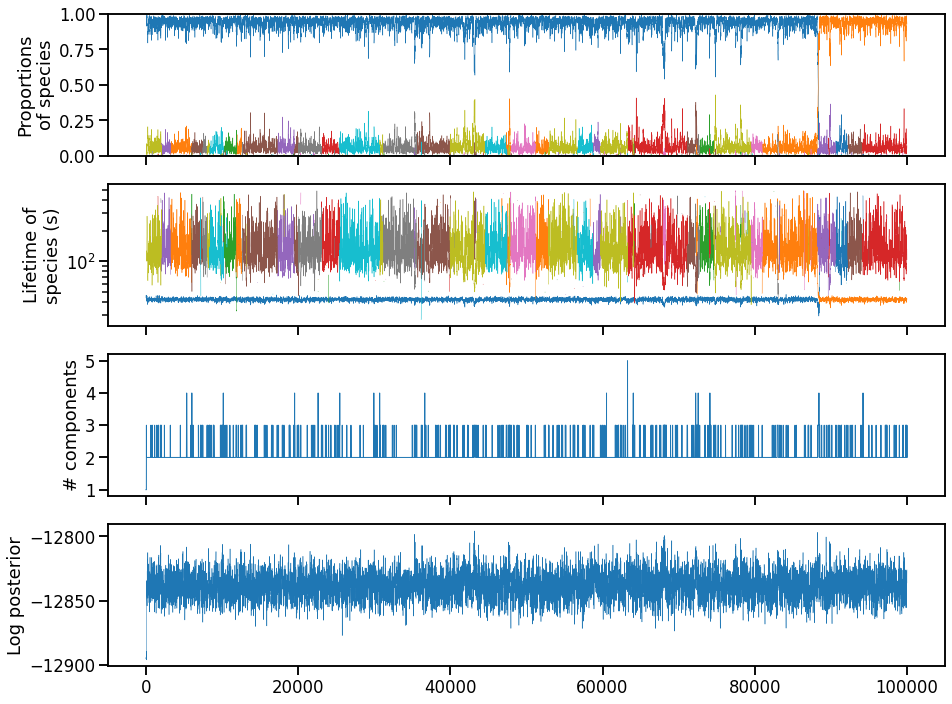

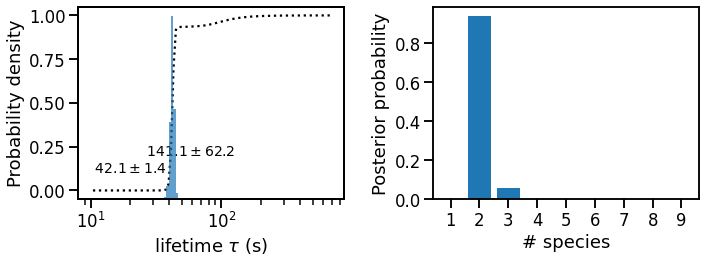

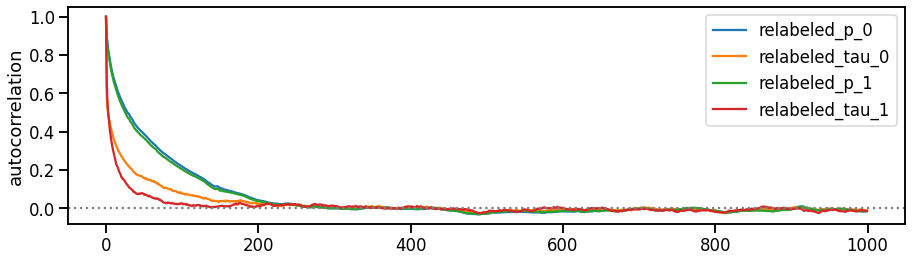

Writing results to BNP_trajectories/mAF_30pN_mcmc_noSB_1e-3.csv.gz


fitting dataset... mAD_30pN


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

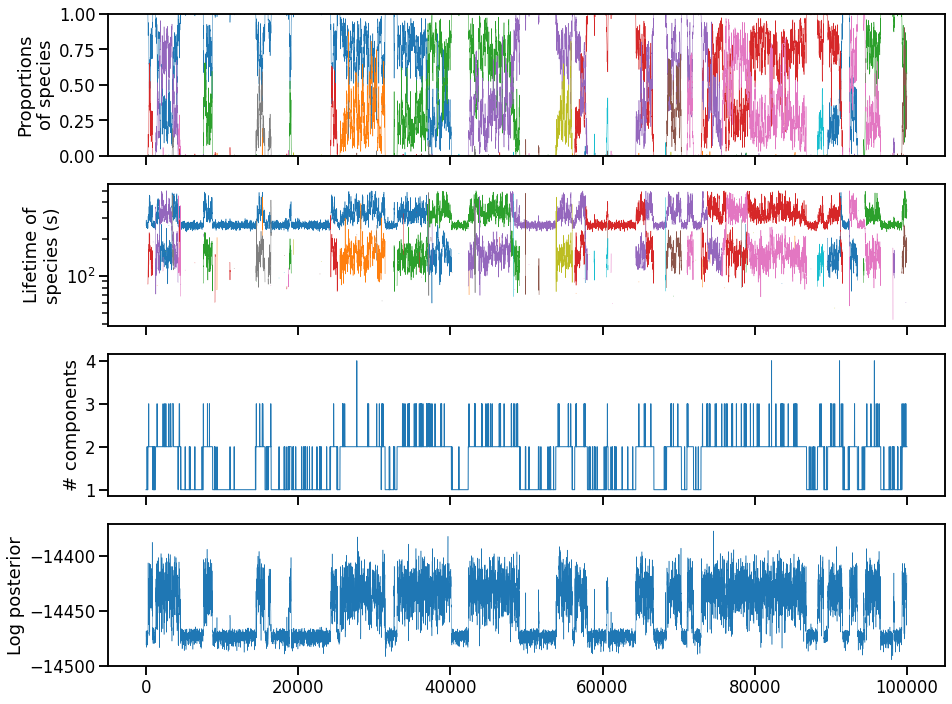

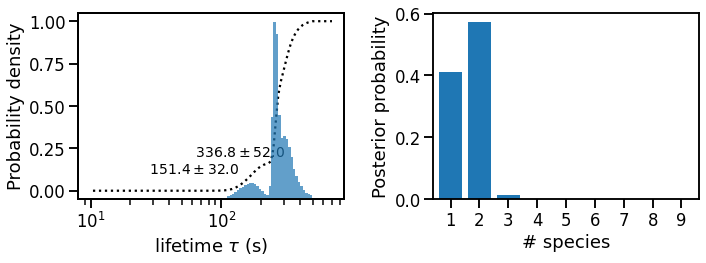

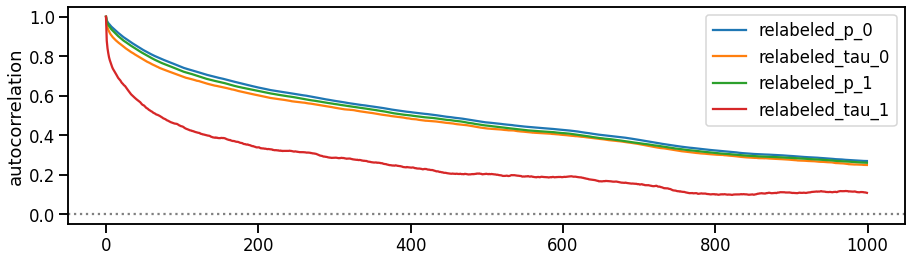

Writing results to BNP_trajectories/mAD_30pN_mcmc_noSB_1e-3.csv.gz


fitting dataset... pAF_30pN


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

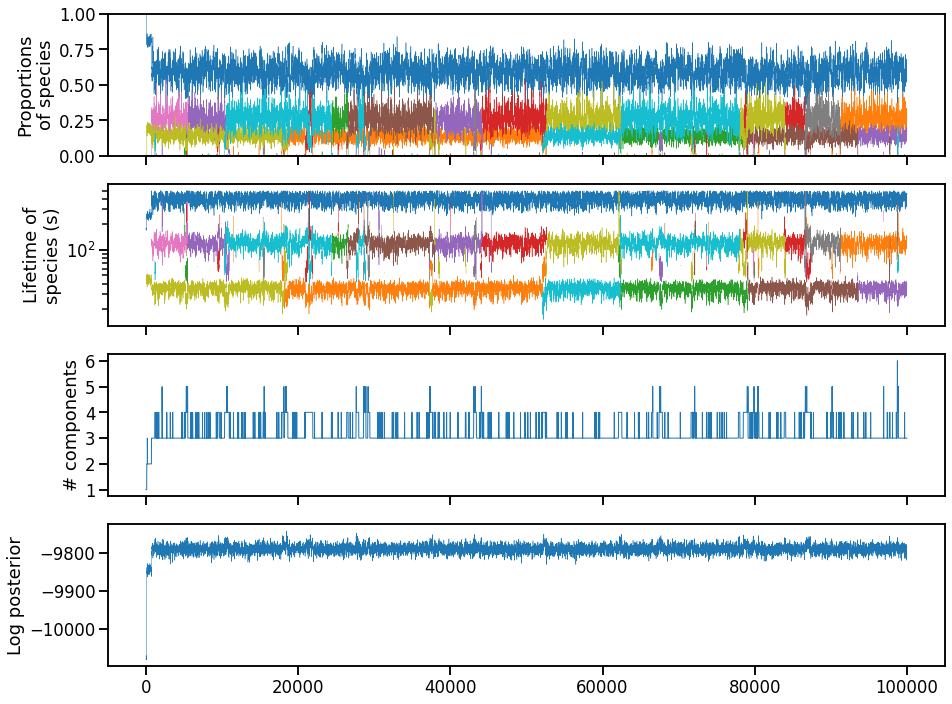

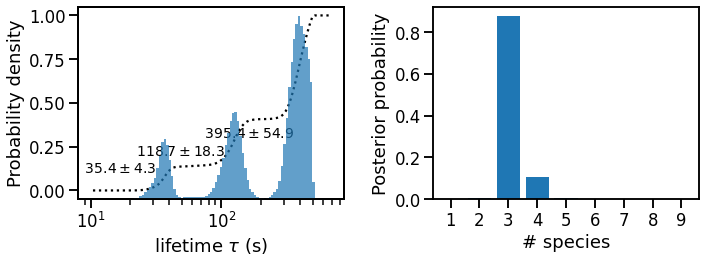

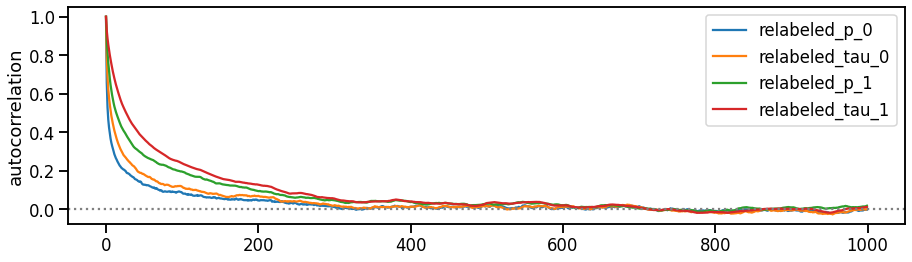

Writing results to BNP_trajectories/pAF_30pN_mcmc_noSB_1e-3.csv.gz


fitting dataset... mAF-mAD_mixed_11


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

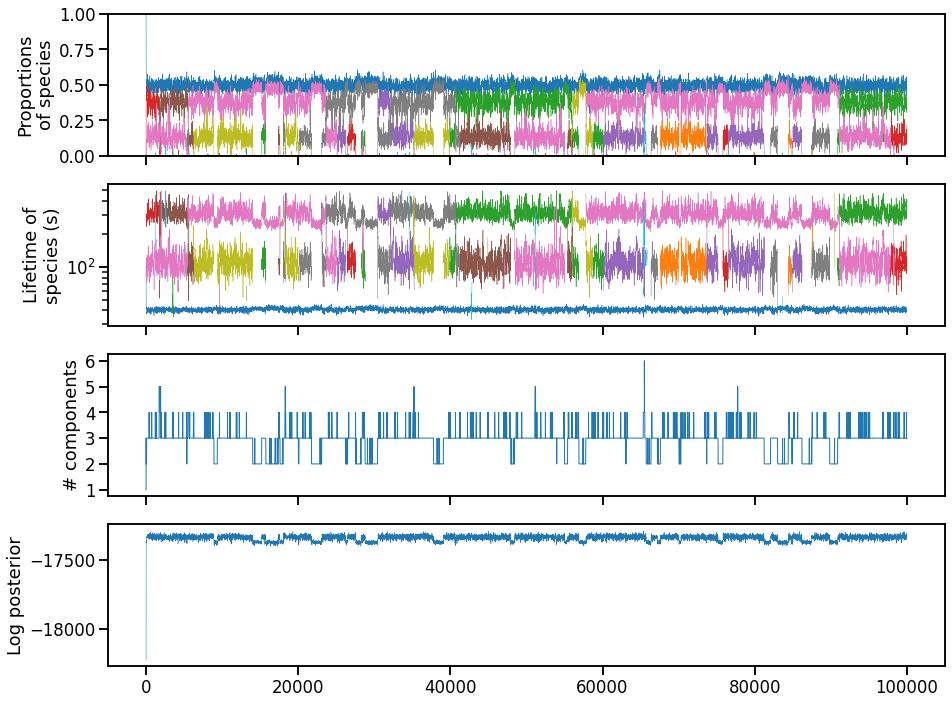

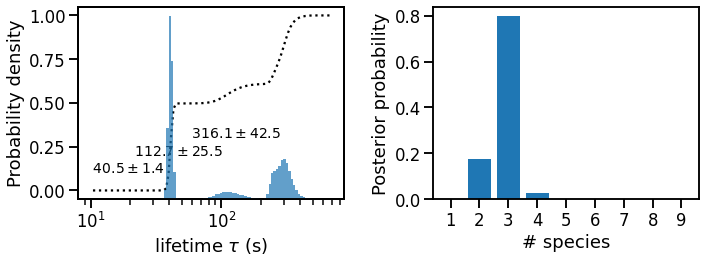

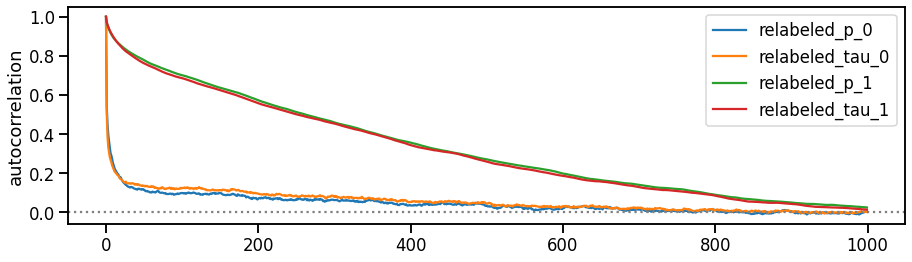

Writing results to BNP_trajectories/mAF-mAD_mixed_11_mcmc_noSB_1e-3.csv.gz


fitting dataset... mAF-mAD_mixed_21


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

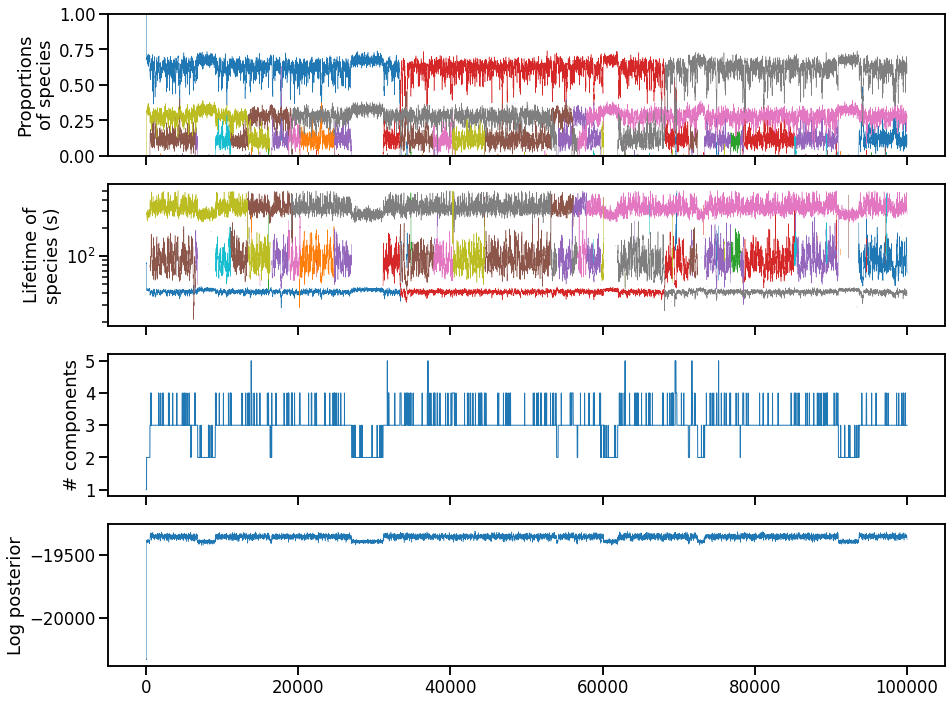

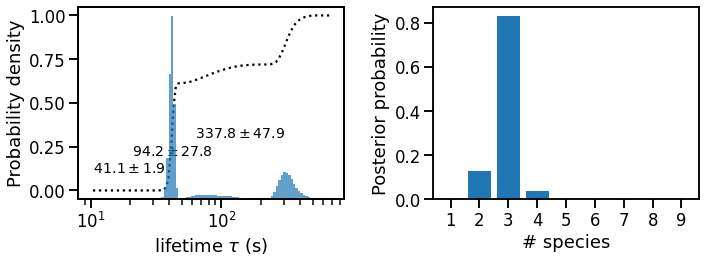

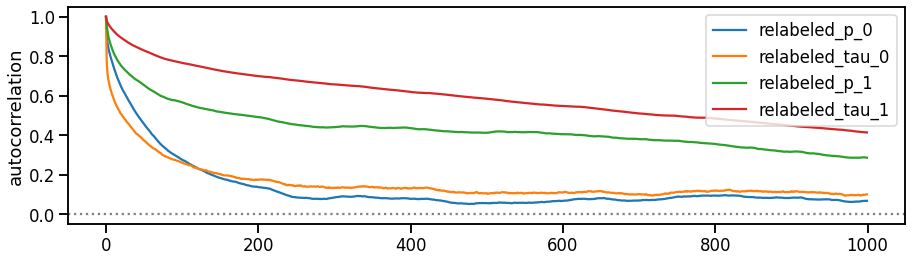

Writing results to BNP_trajectories/mAF-mAD_mixed_21_mcmc_noSB_1e-3.csv.gz


fitting dataset... mAF-mAD_mixed_12


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

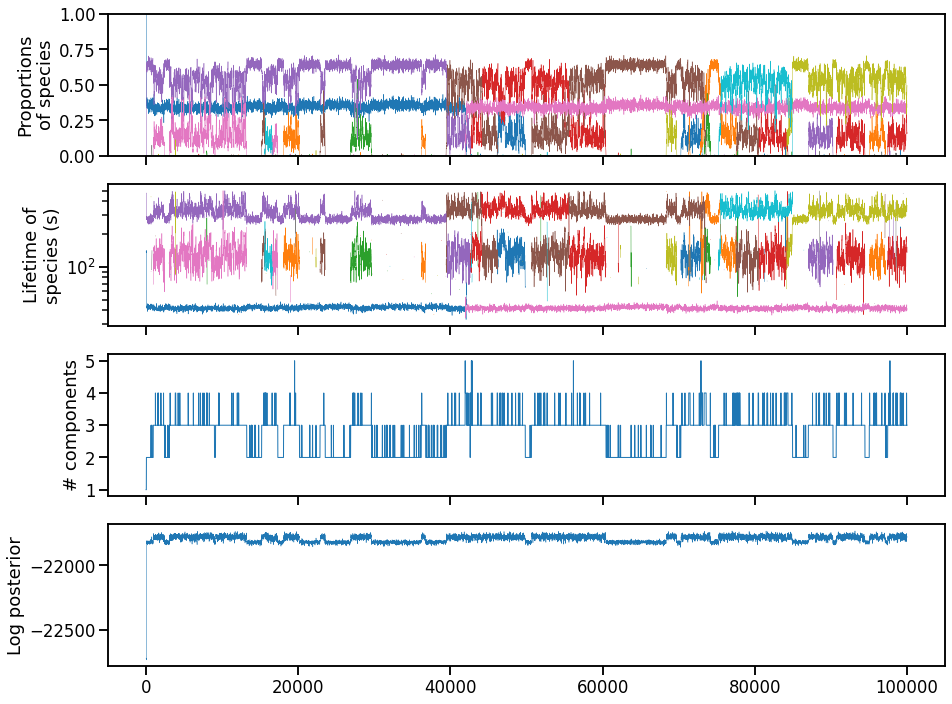

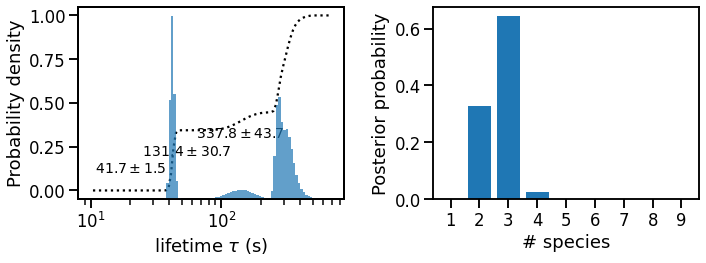

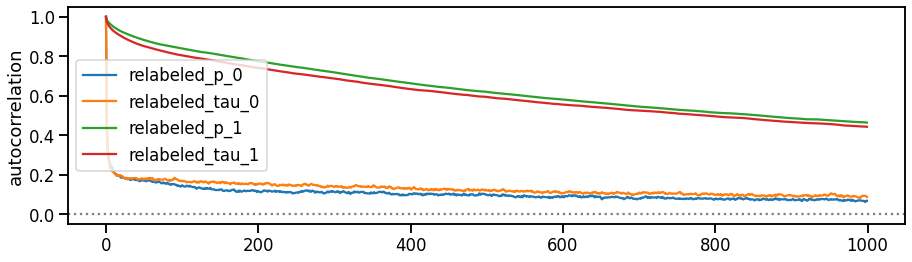

Writing results to BNP_trajectories/mAF-mAD_mixed_12_mcmc_noSB_1e-3.csv.gz


NEXT SET
fitting dataset... mAF_30pN


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

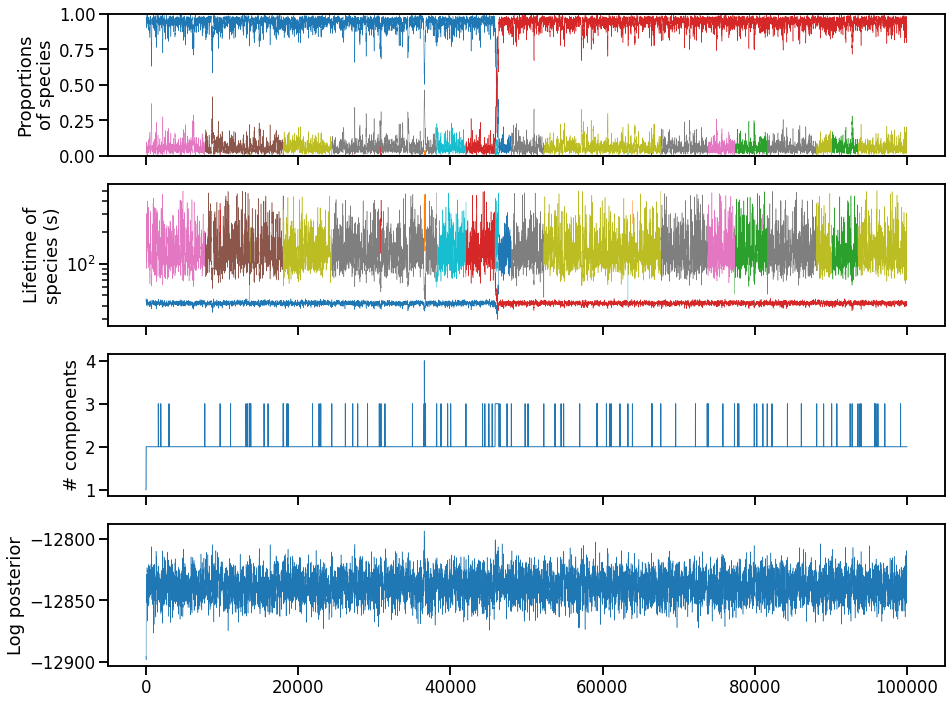

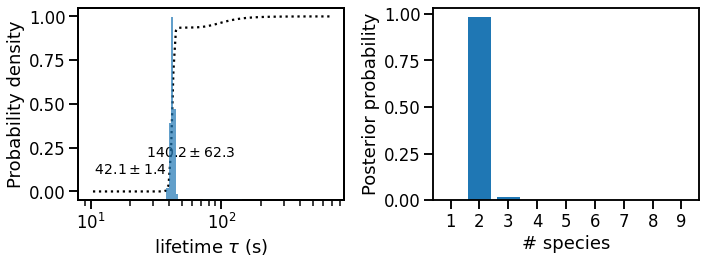

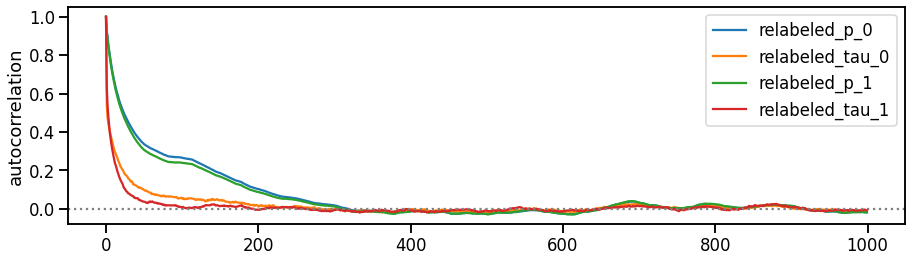

Writing results to BNP_trajectories/mAF_30pN_mcmc_noSB_3e-4.csv.gz


fitting dataset... mAD_30pN


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

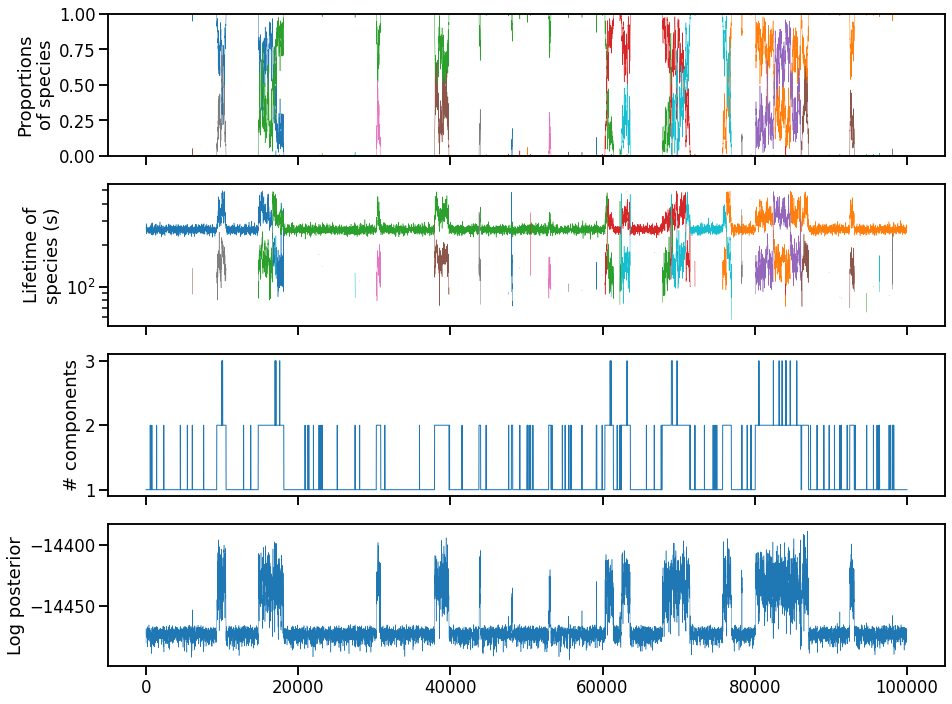

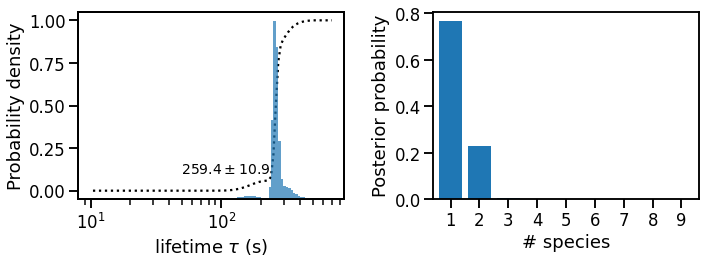

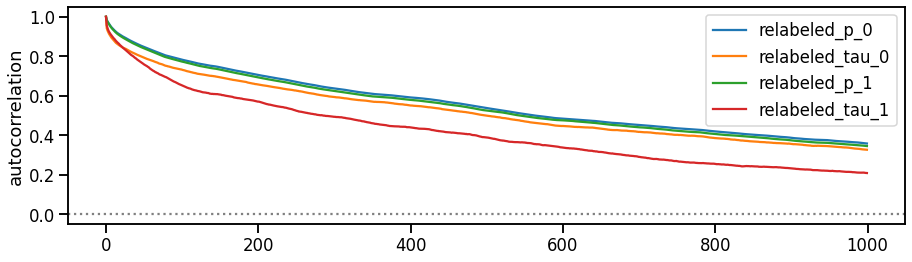

Writing results to BNP_trajectories/mAD_30pN_mcmc_noSB_3e-4.csv.gz


fitting dataset... pAF_30pN


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

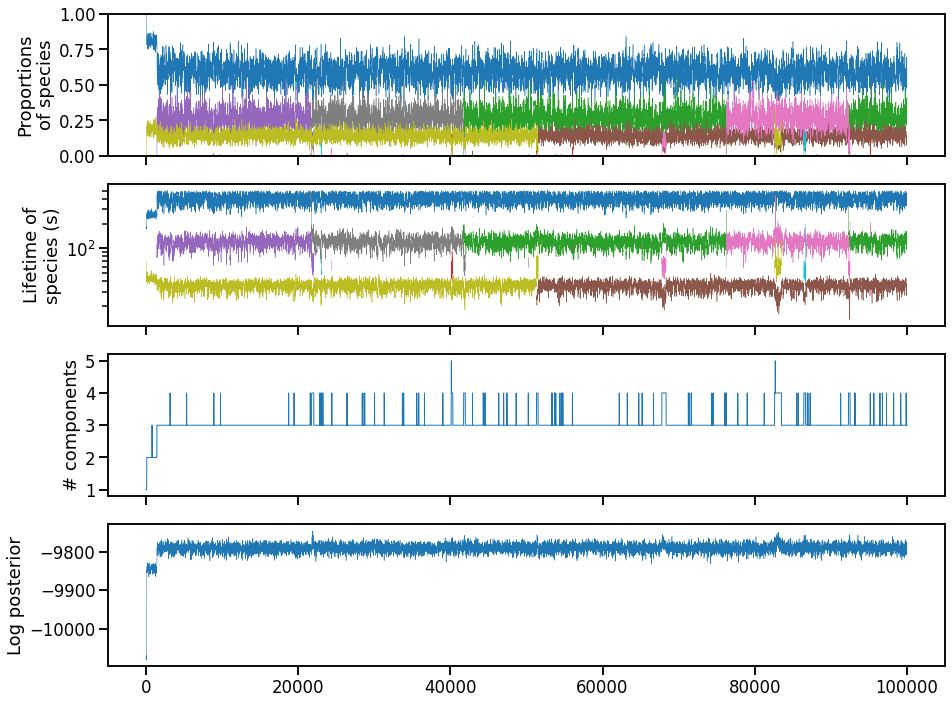

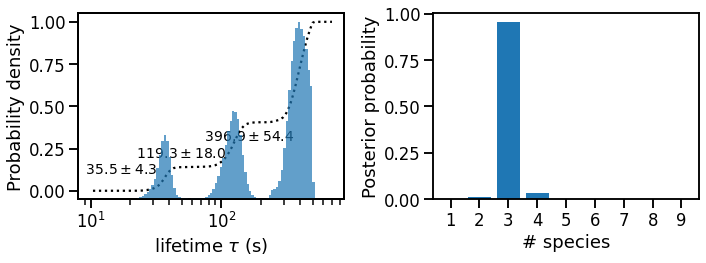

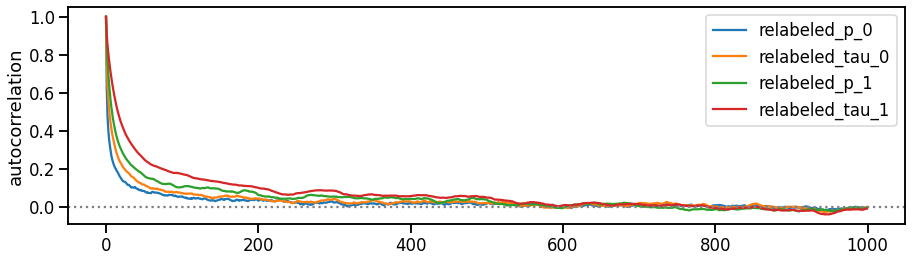

Writing results to BNP_trajectories/pAF_30pN_mcmc_noSB_3e-4.csv.gz


fitting dataset... mAF-mAD_mixed_11


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

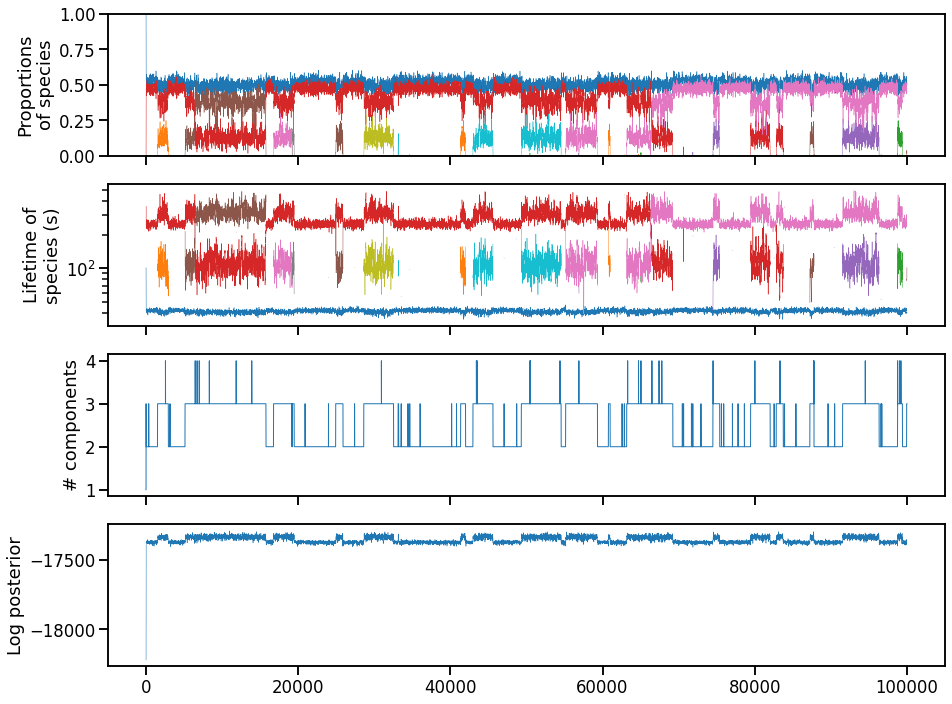

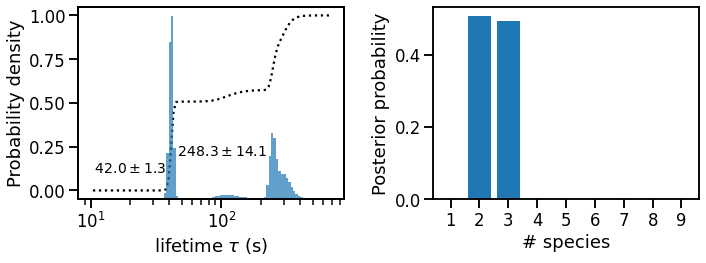

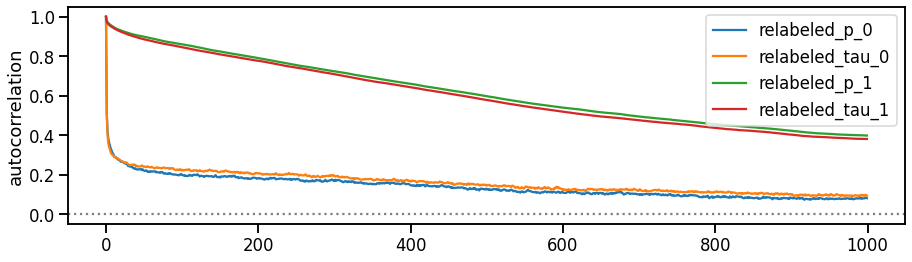

Writing results to BNP_trajectories/mAF-mAD_mixed_11_mcmc_noSB_3e-4.csv.gz


fitting dataset... mAF-mAD_mixed_21


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

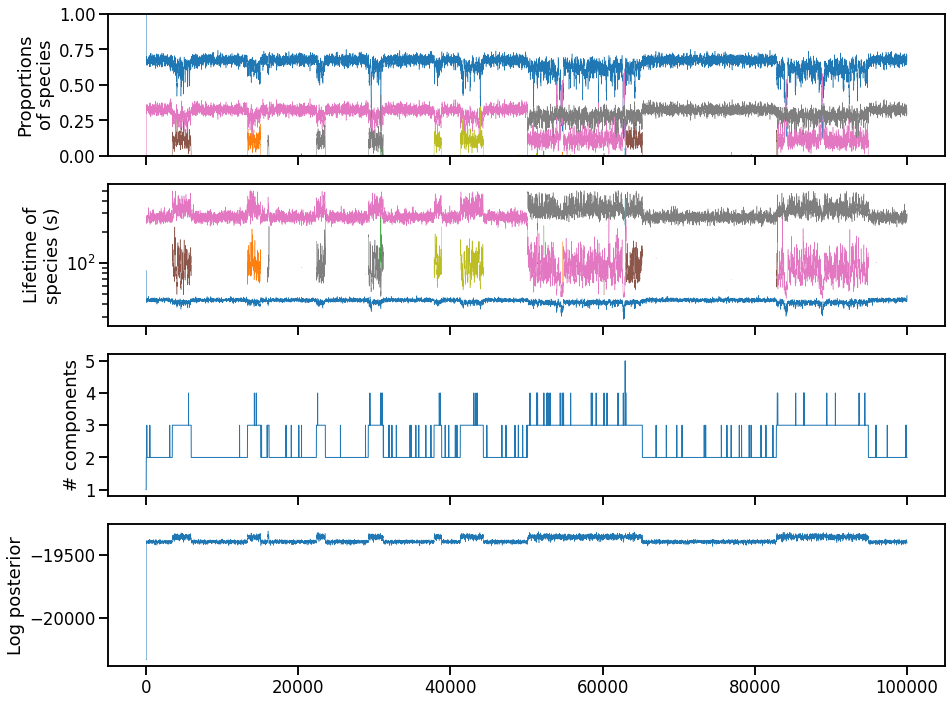

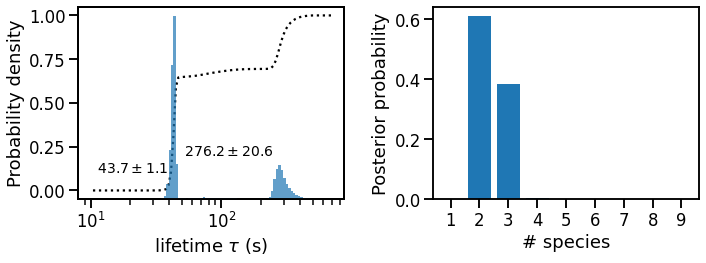

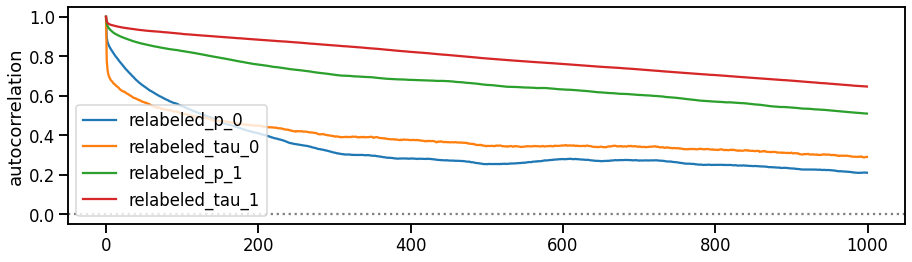

Writing results to BNP_trajectories/mAF-mAD_mixed_21_mcmc_noSB_3e-4.csv.gz


fitting dataset... mAF-mAD_mixed_12


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

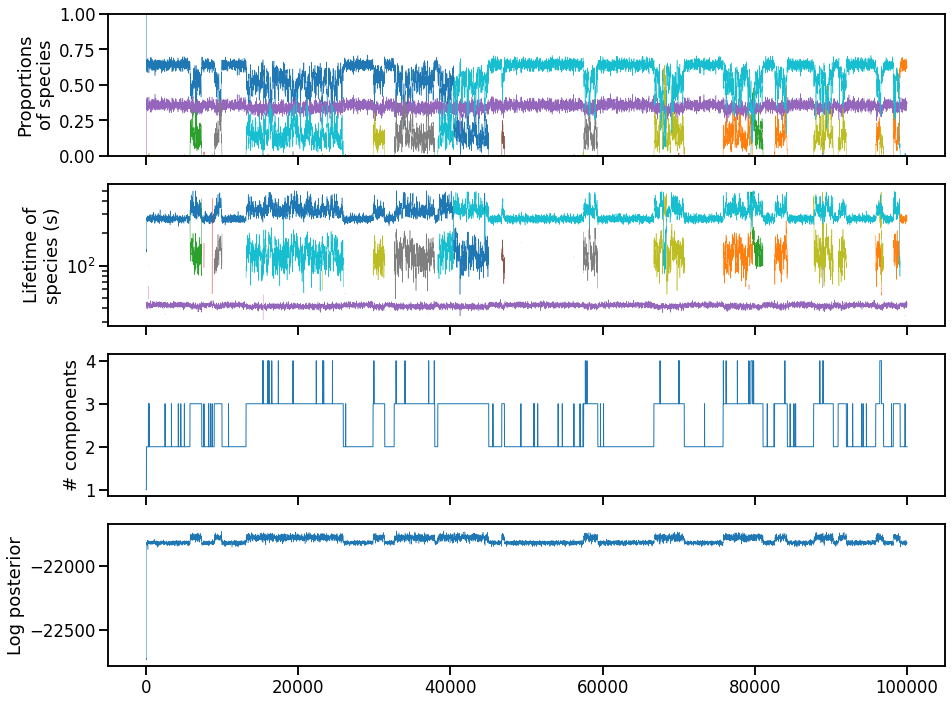

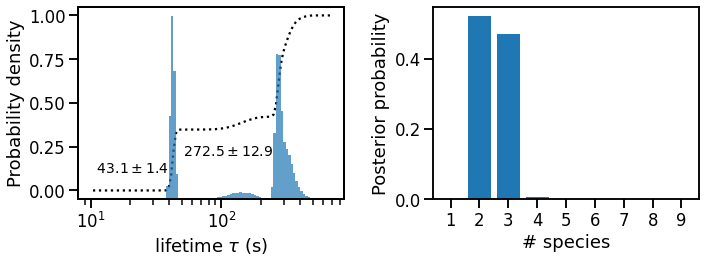

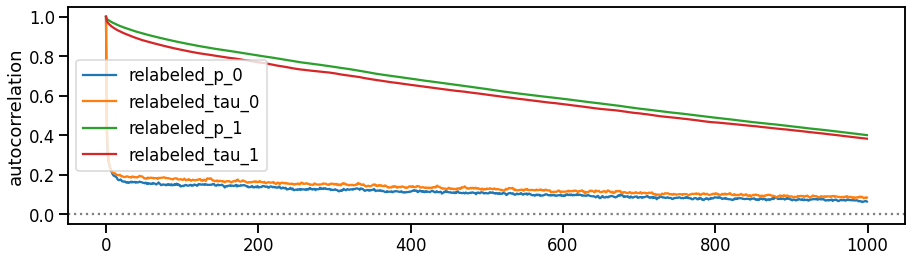

Writing results to BNP_trajectories/mAF-mAD_mixed_12_mcmc_noSB_3e-4.csv.gz


NEXT SET
fitting dataset... mAF_30pN


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

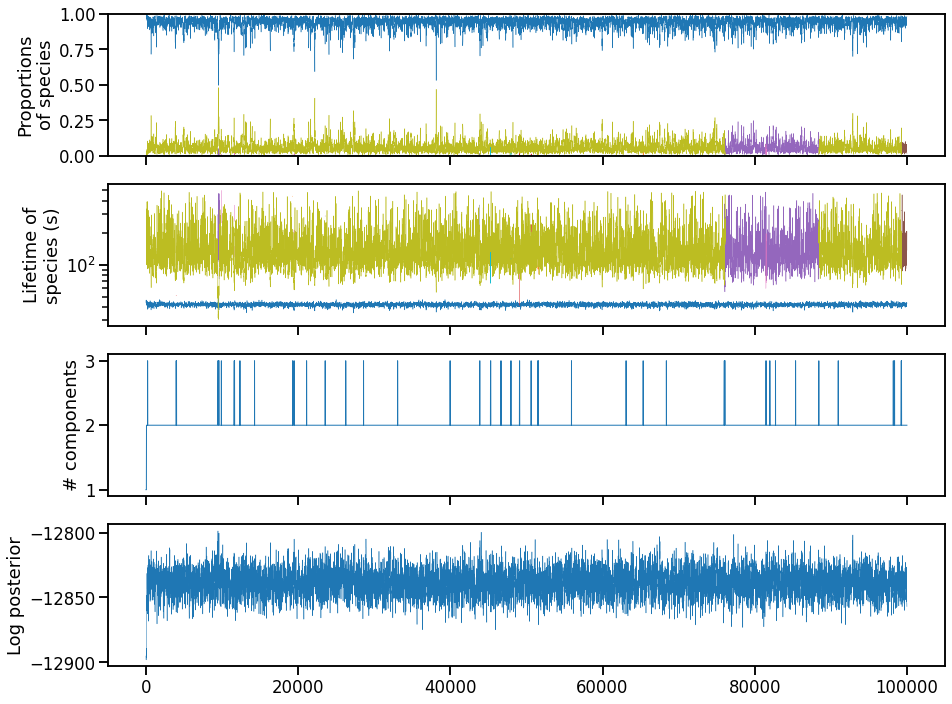

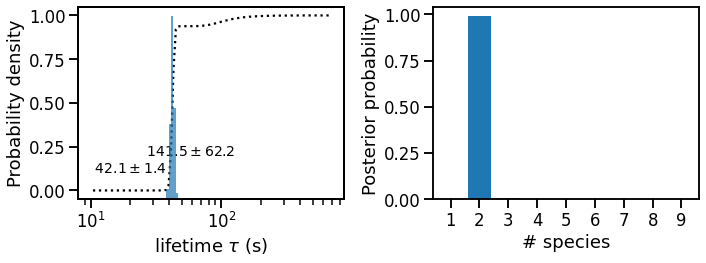

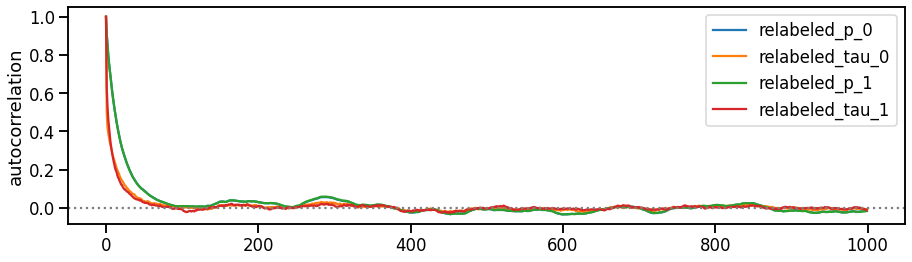

Writing results to BNP_trajectories/mAF_30pN_mcmc_noSB_1e-4.csv.gz


fitting dataset... mAD_30pN


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

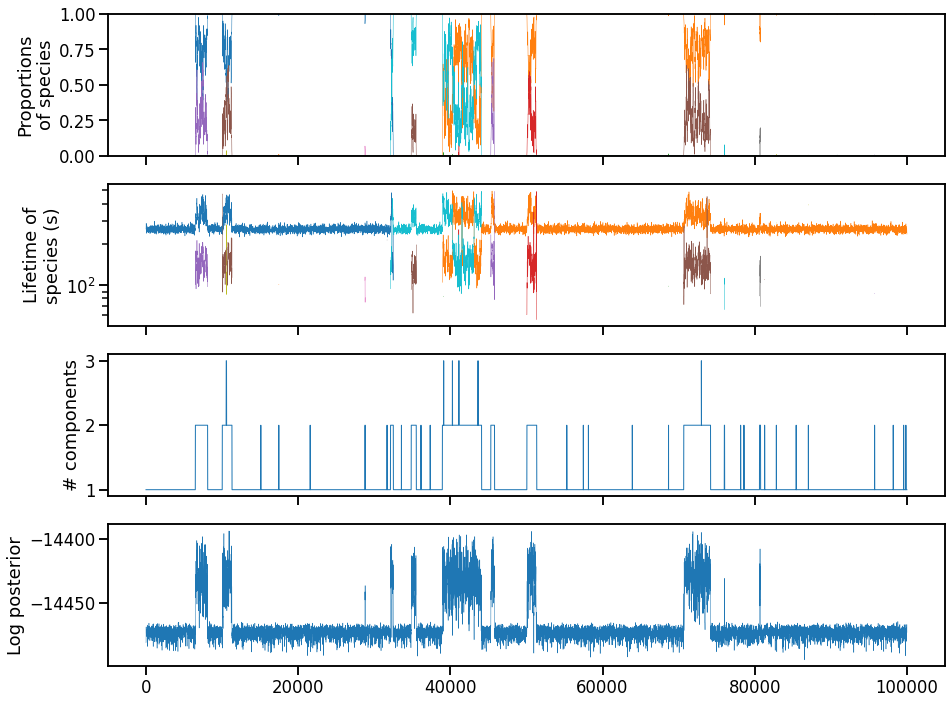

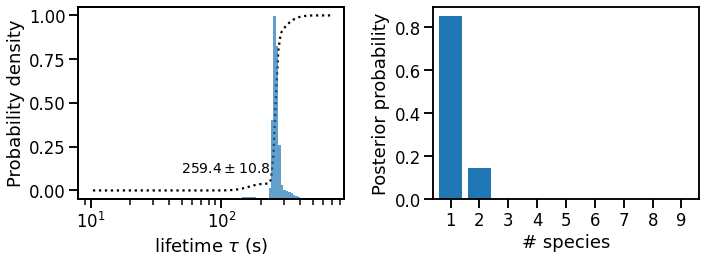

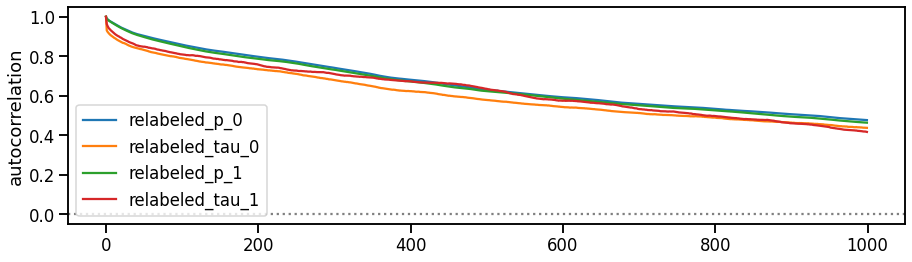

Writing results to BNP_trajectories/mAD_30pN_mcmc_noSB_1e-4.csv.gz


fitting dataset... pAF_30pN


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

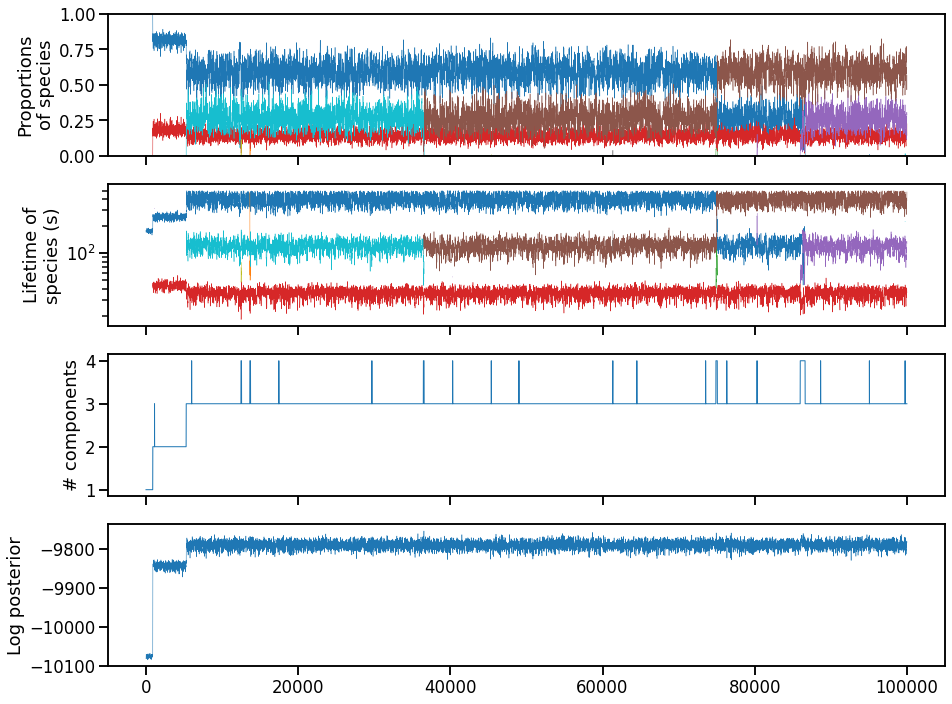

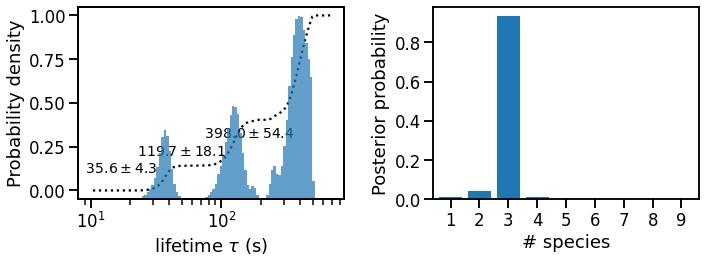

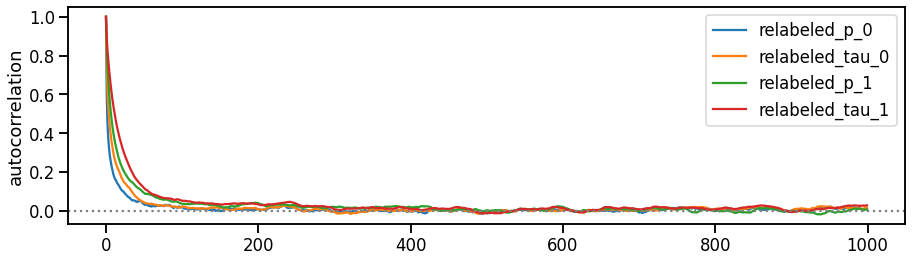

Writing results to BNP_trajectories/pAF_30pN_mcmc_noSB_1e-4.csv.gz


fitting dataset... mAF-mAD_mixed_11


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

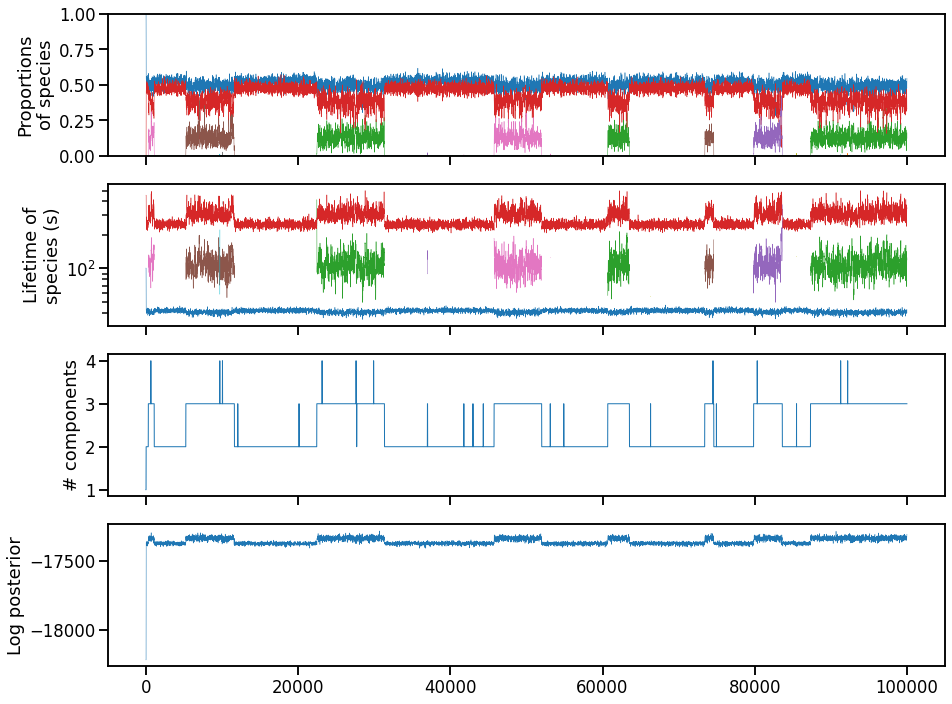

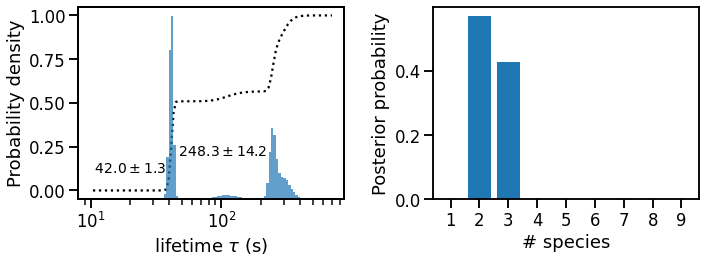

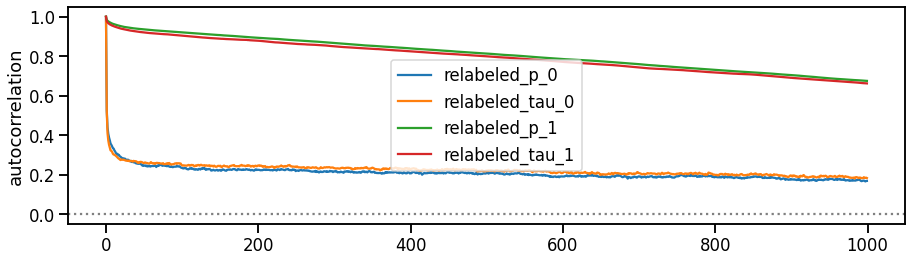

Writing results to BNP_trajectories/mAF-mAD_mixed_11_mcmc_noSB_1e-4.csv.gz


fitting dataset... mAF-mAD_mixed_21


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

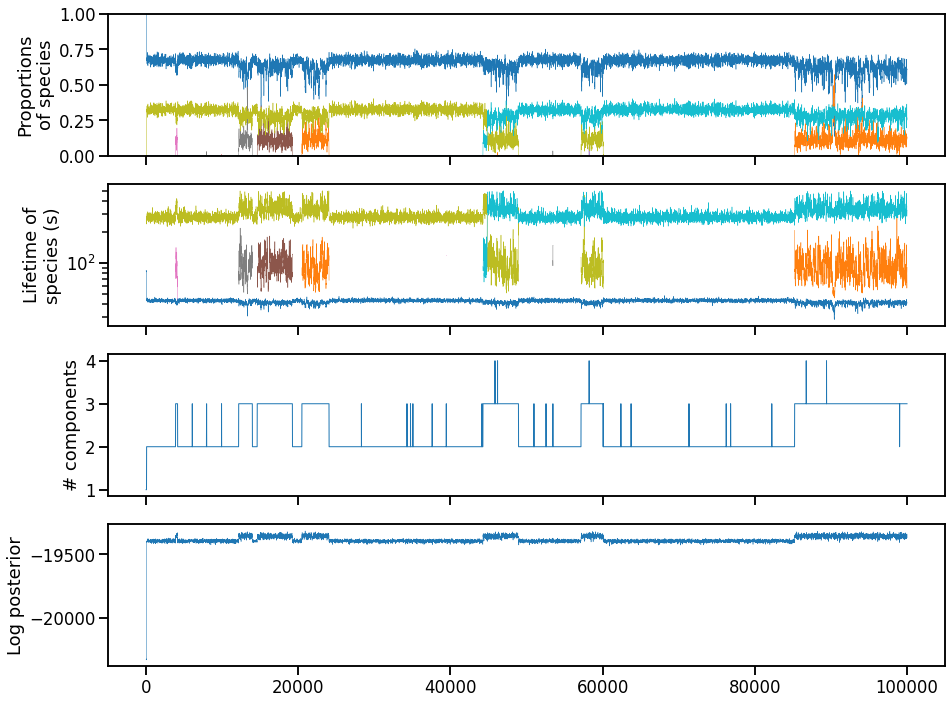

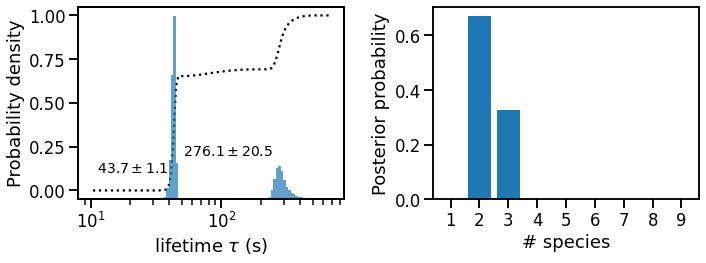

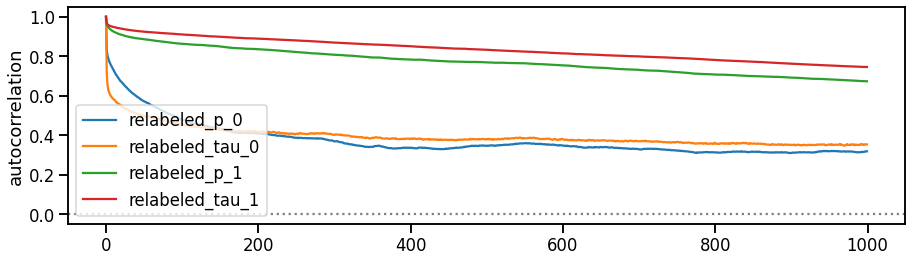

Writing results to BNP_trajectories/mAF-mAD_mixed_21_mcmc_noSB_1e-4.csv.gz


fitting dataset... mAF-mAD_mixed_12


/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


  0%|          | 0/100000 [00:00<?, ?it/s]

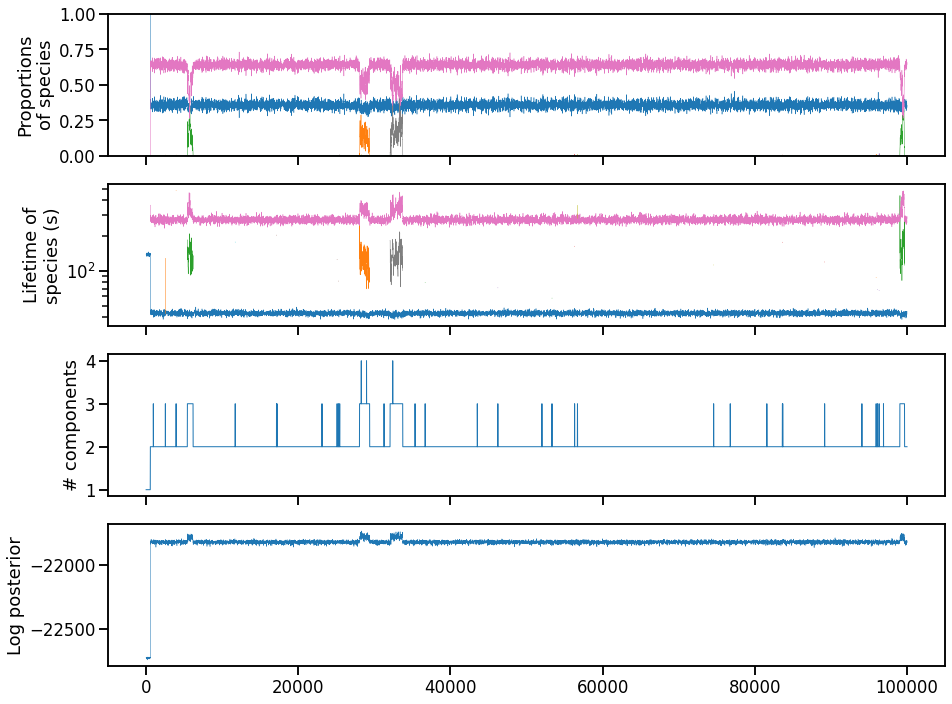

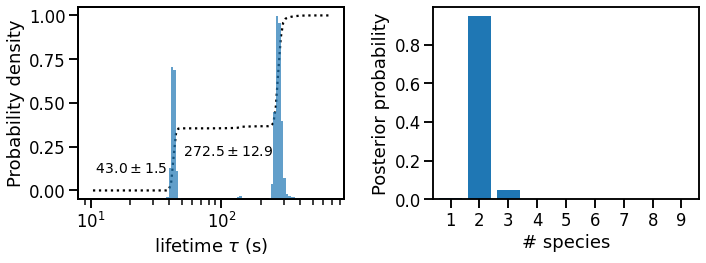

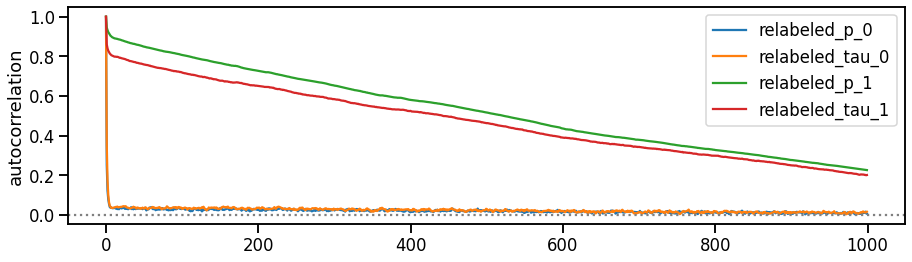

Writing results to BNP_trajectories/mAF-mAD_mixed_12_mcmc_noSB_1e-4.csv.gz


NEXT SET
fitting dataset... mAF_30pN


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


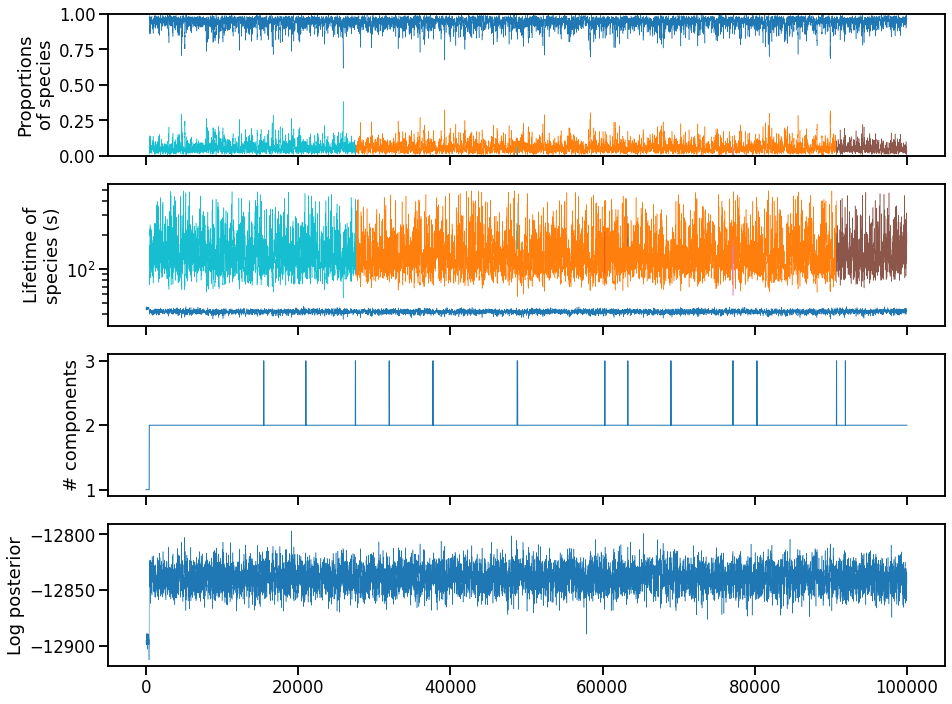

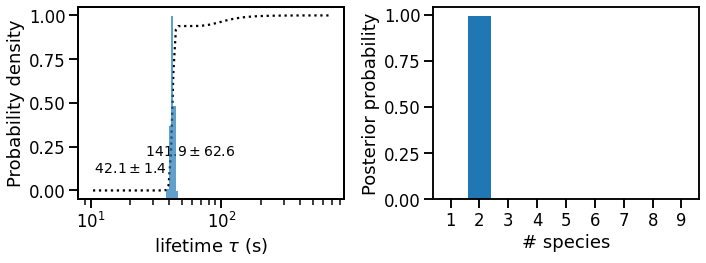

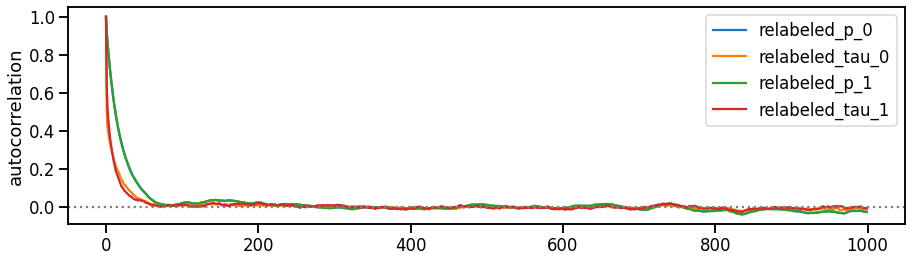

Writing results to BNP_trajectories/mAF_30pN_mcmc_noSB_3e-5.csv.gz


fitting dataset... mAD_30pN


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


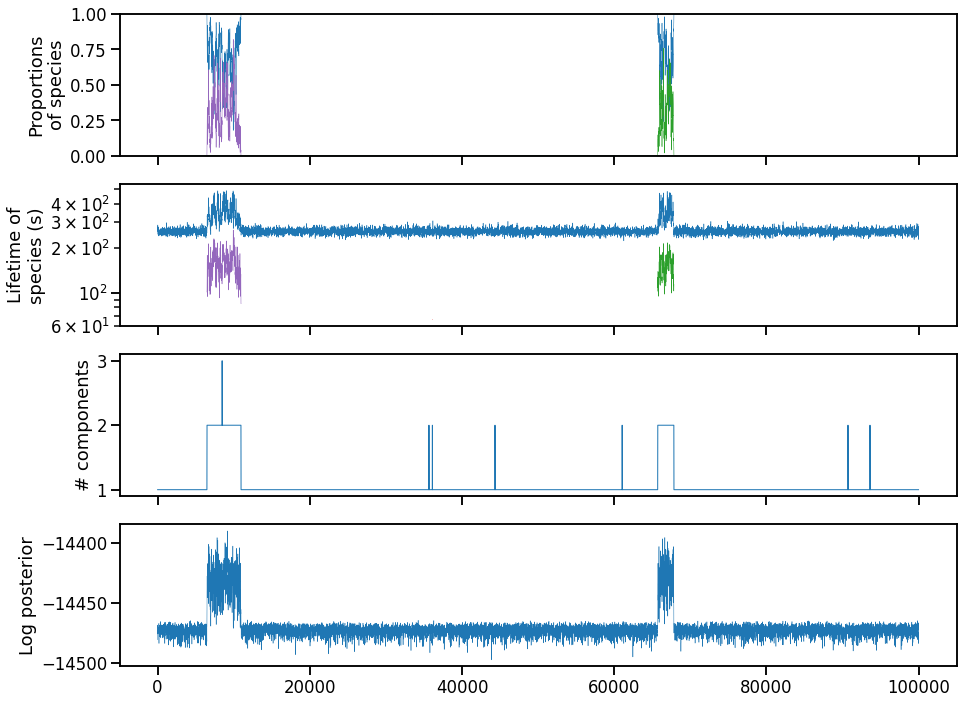

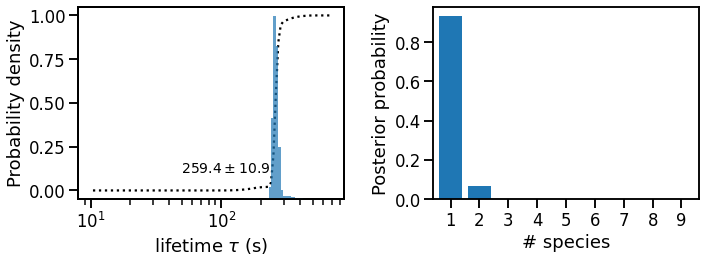

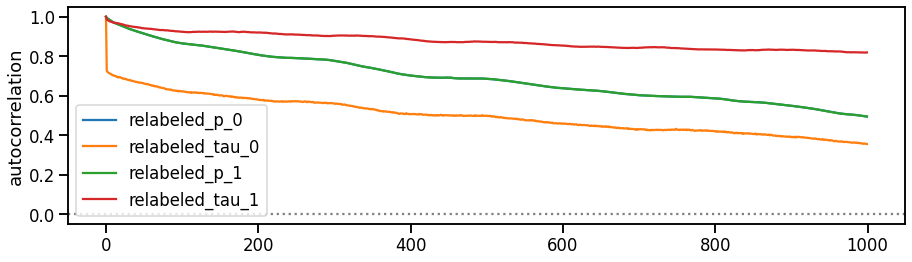

Writing results to BNP_trajectories/mAD_30pN_mcmc_noSB_3e-5.csv.gz


fitting dataset... pAF_30pN


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


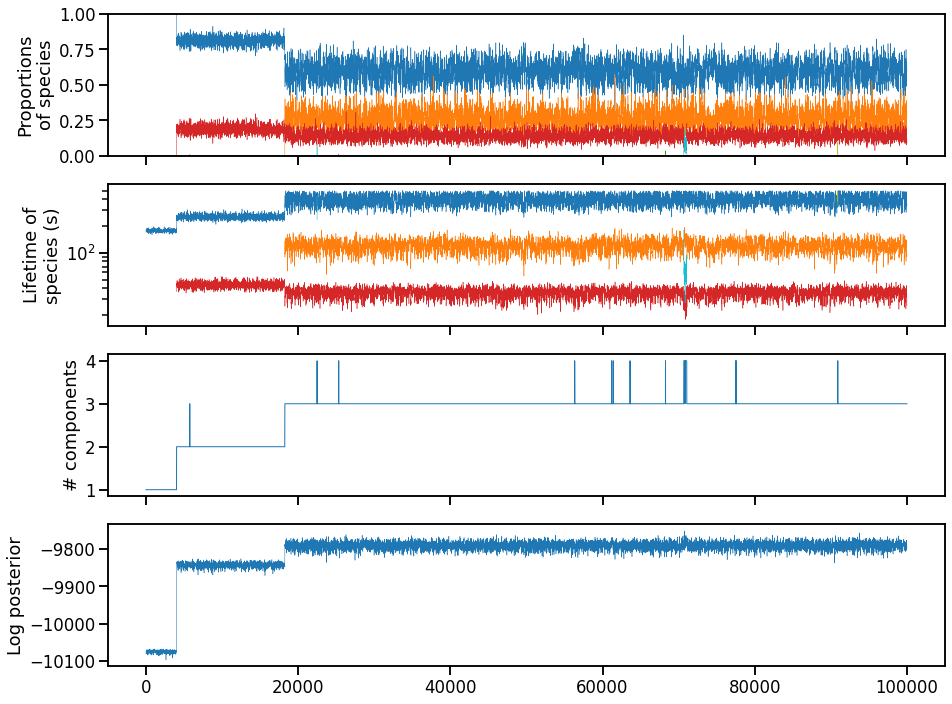

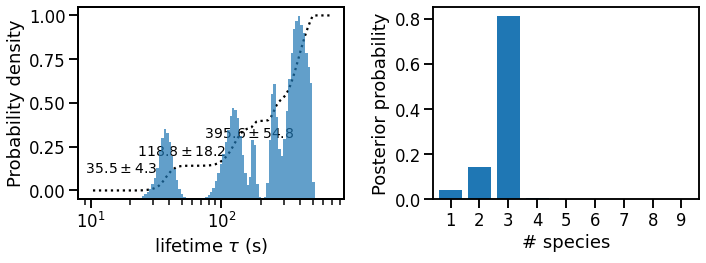

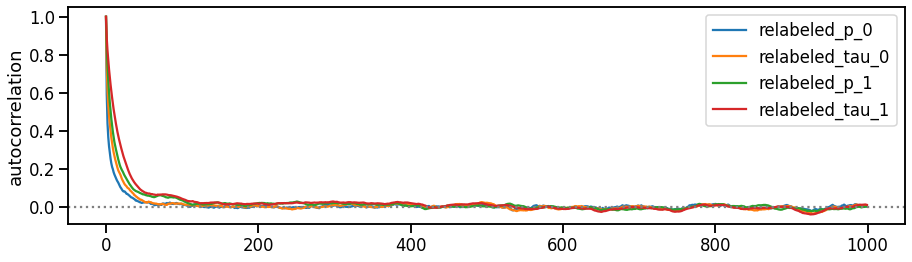

Writing results to BNP_trajectories/pAF_30pN_mcmc_noSB_3e-5.csv.gz


fitting dataset... mAF-mAD_mixed_11


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


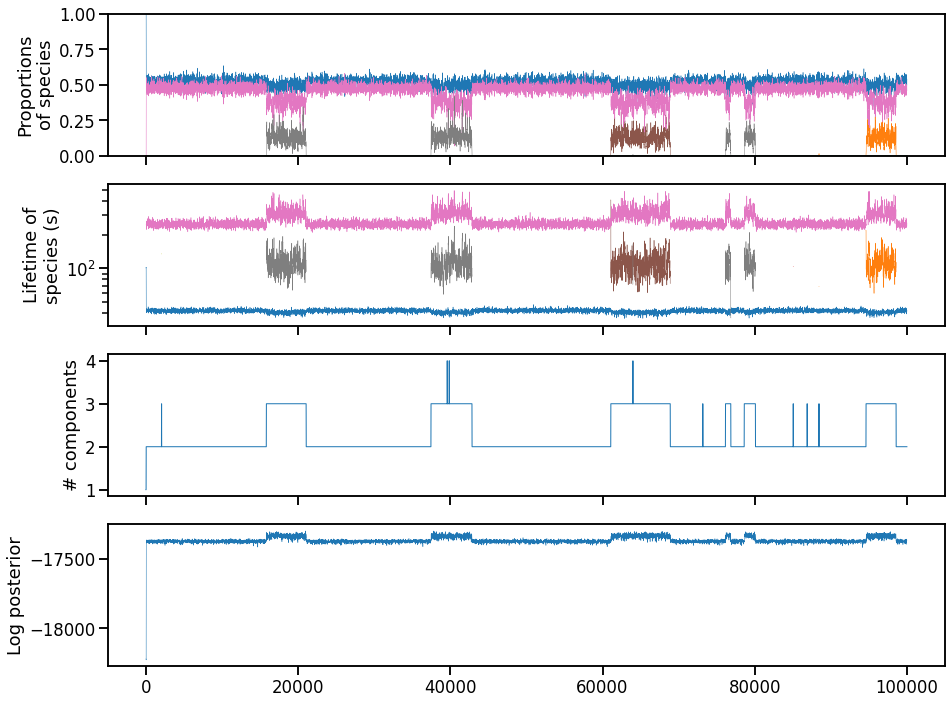

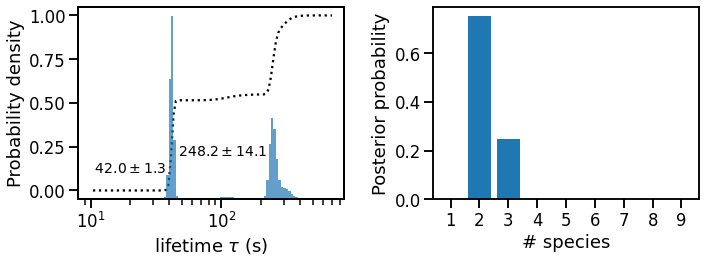

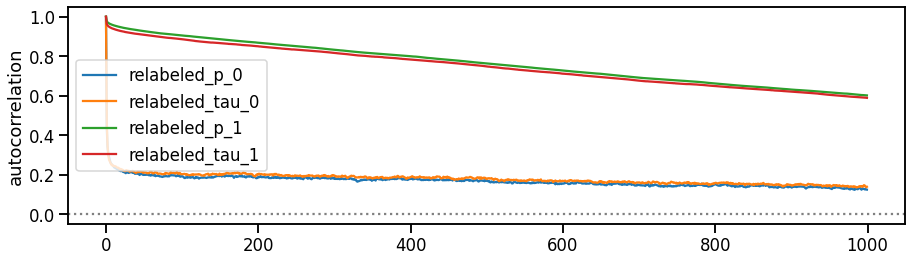

Writing results to BNP_trajectories/mAF-mAD_mixed_11_mcmc_noSB_3e-5.csv.gz


fitting dataset... mAF-mAD_mixed_21


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


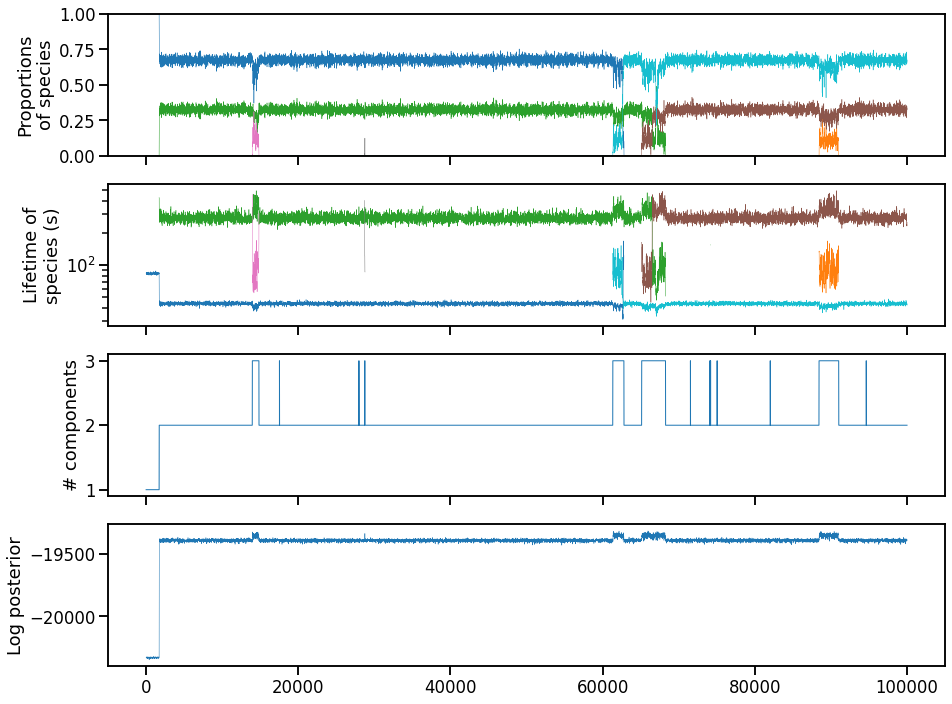

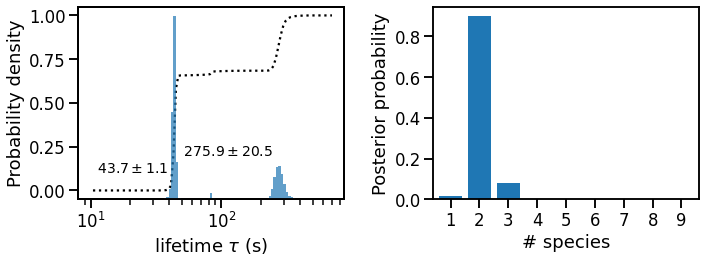

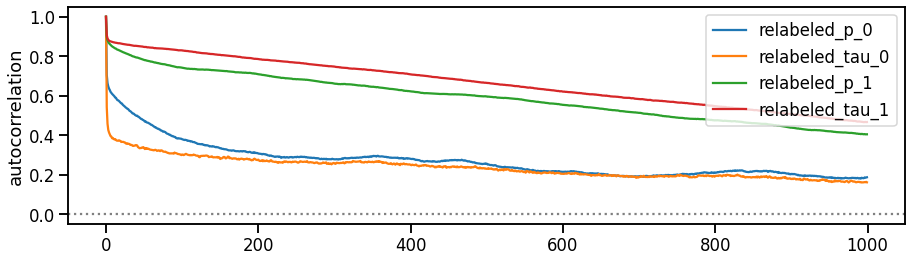

Writing results to BNP_trajectories/mAF-mAD_mixed_21_mcmc_noSB_3e-5.csv.gz


fitting dataset... mAF-mAD_mixed_12


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


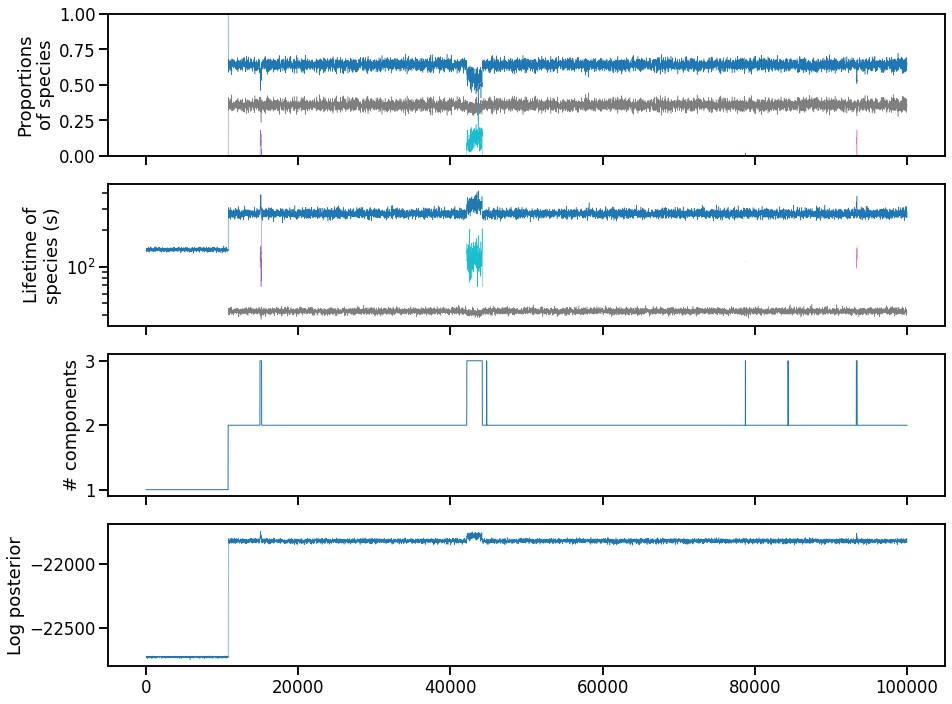

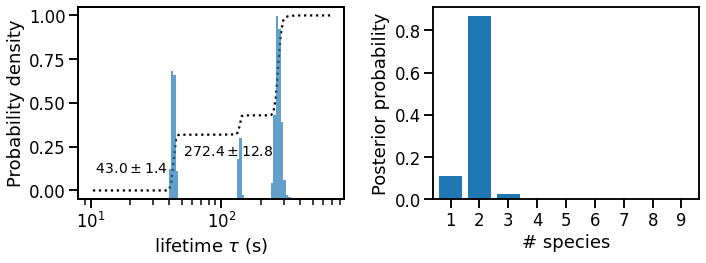

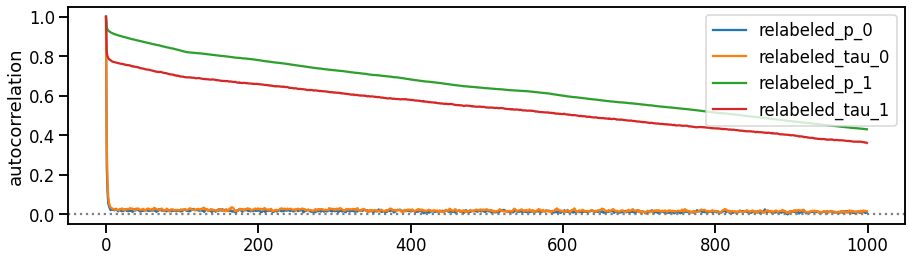

Writing results to BNP_trajectories/mAF-mAD_mixed_12_mcmc_noSB_3e-5.csv.gz


NEXT SET
fitting dataset... mAF_30pN


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


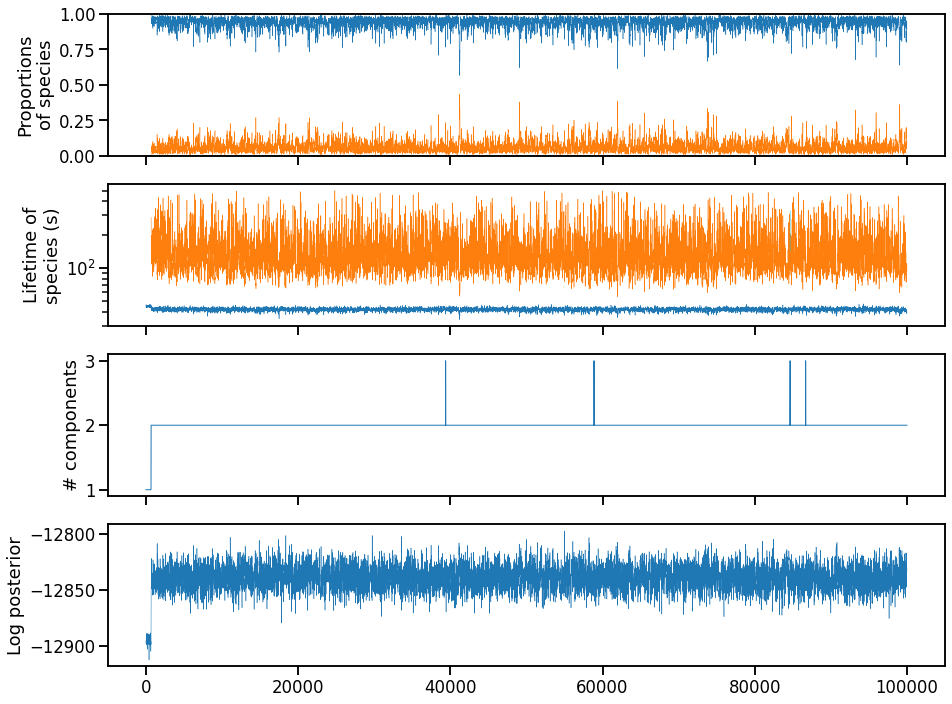

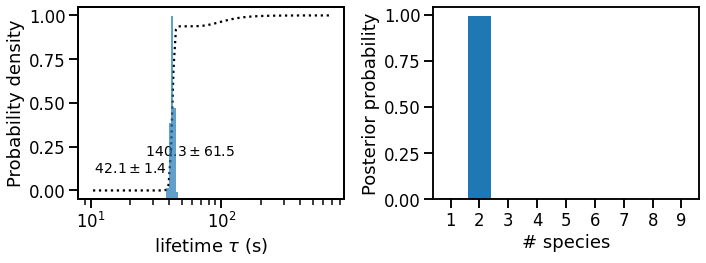

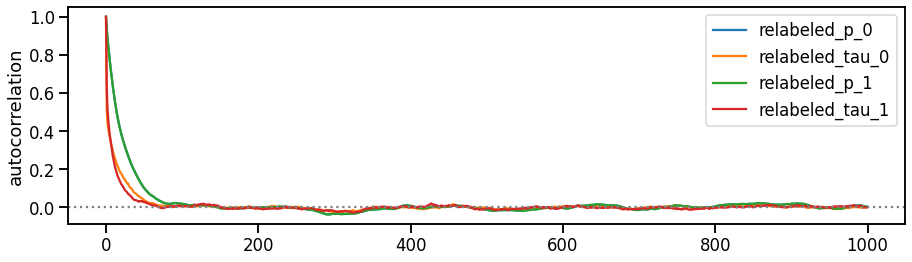

Writing results to BNP_trajectories/mAF_30pN_mcmc_noSB_1e-5.csv.gz


fitting dataset... mAD_30pN


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


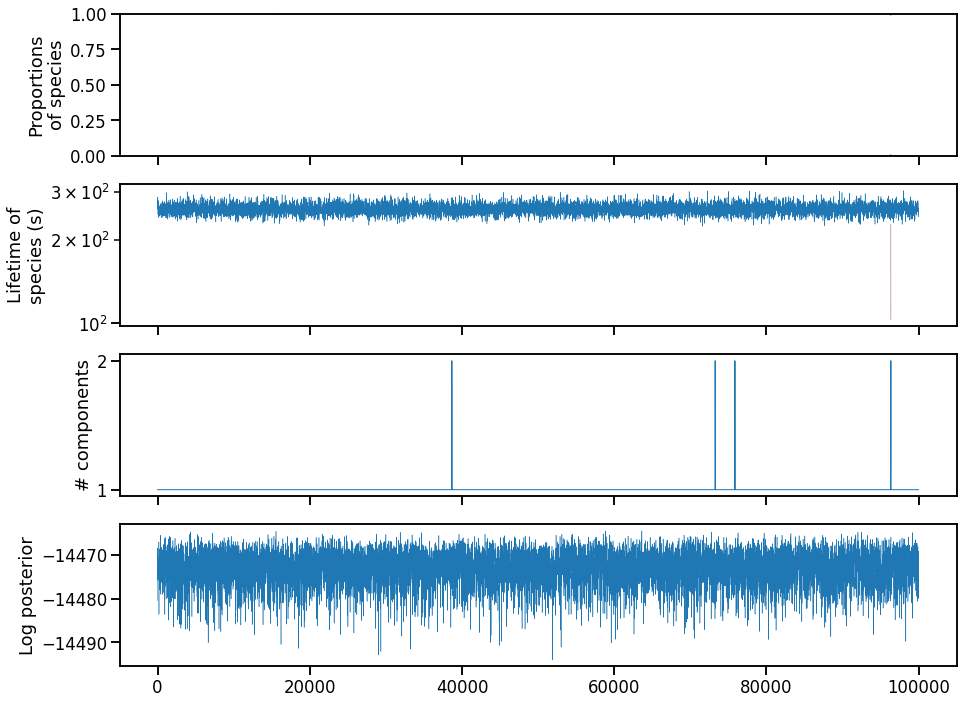

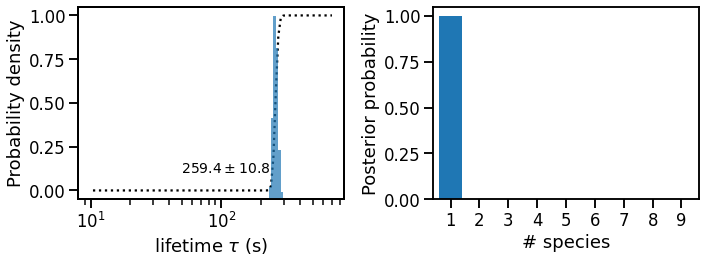

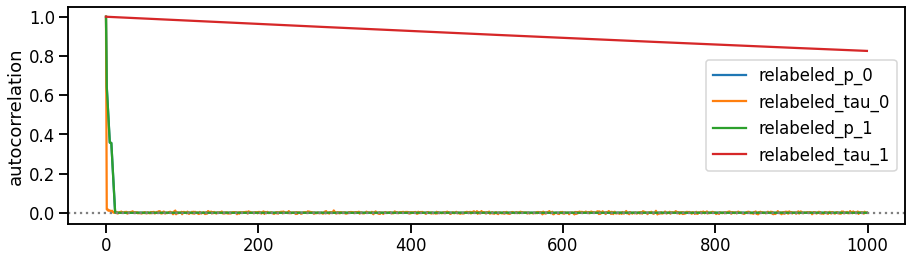

Writing results to BNP_trajectories/mAD_30pN_mcmc_noSB_1e-5.csv.gz


fitting dataset... pAF_30pN


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


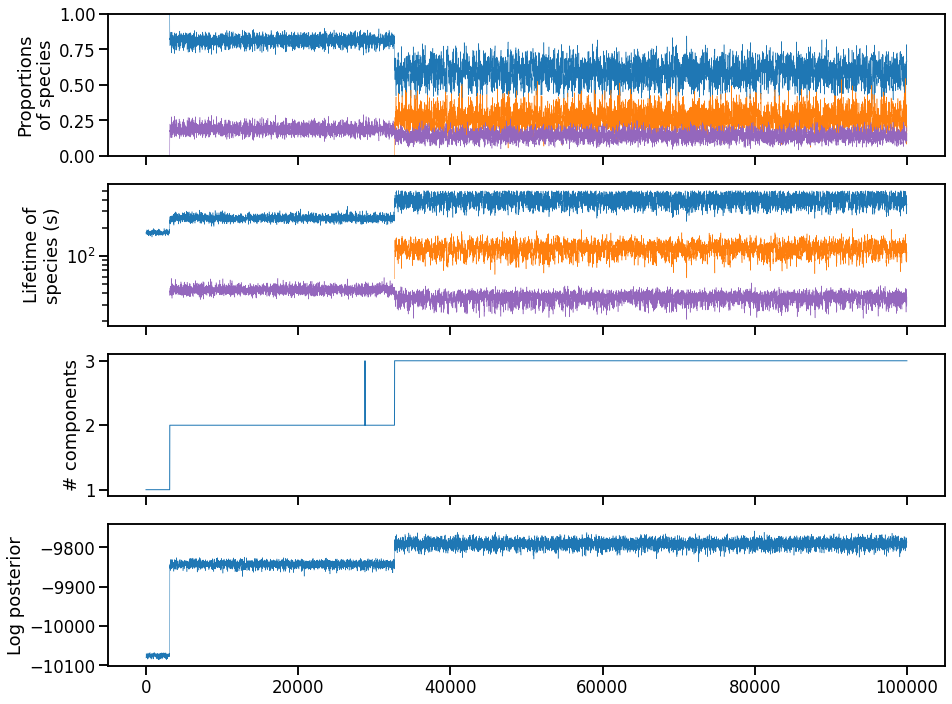

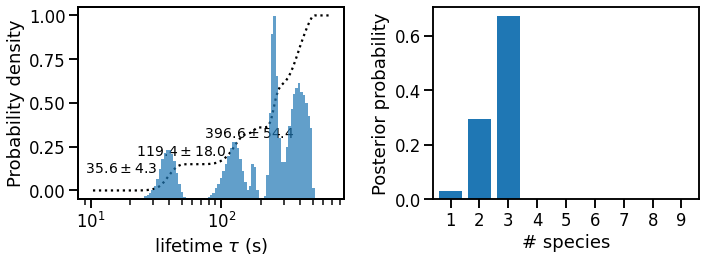

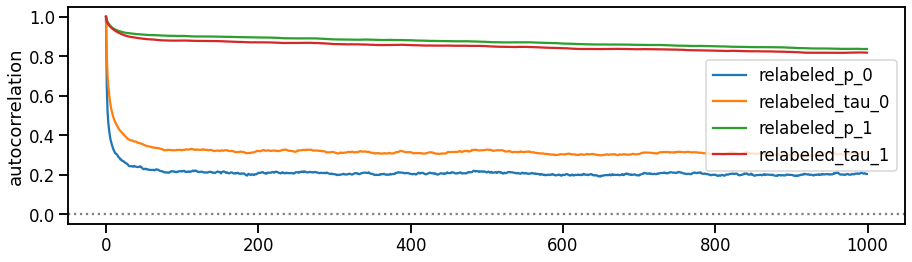

Writing results to BNP_trajectories/pAF_30pN_mcmc_noSB_1e-5.csv.gz


fitting dataset... mAF-mAD_mixed_11


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


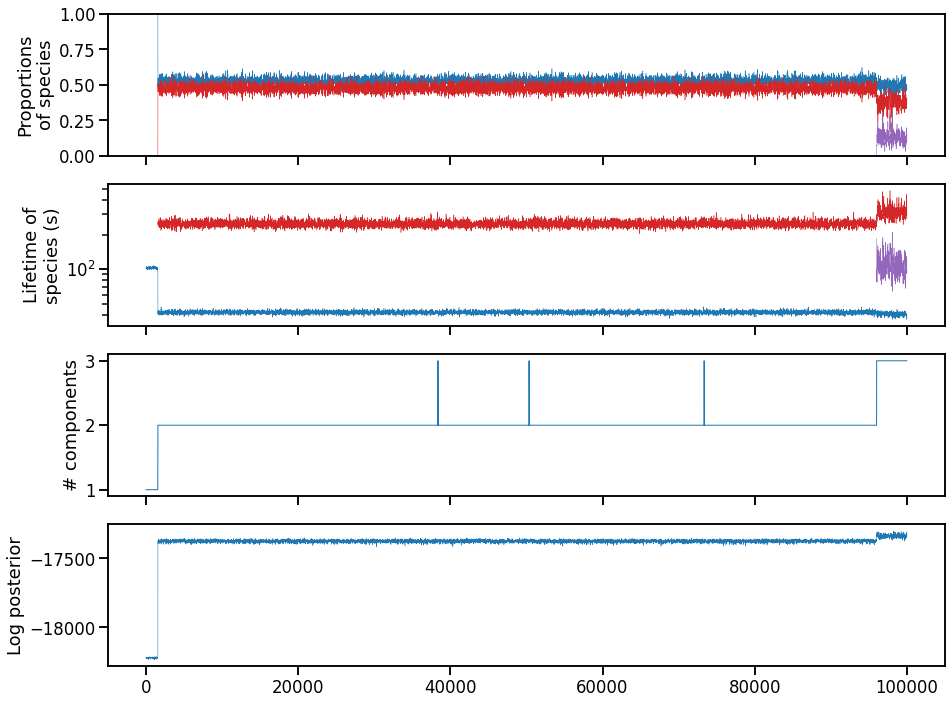

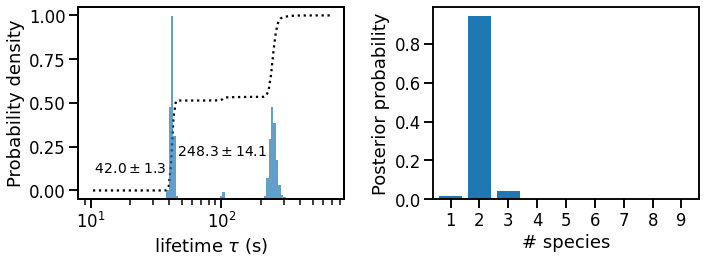

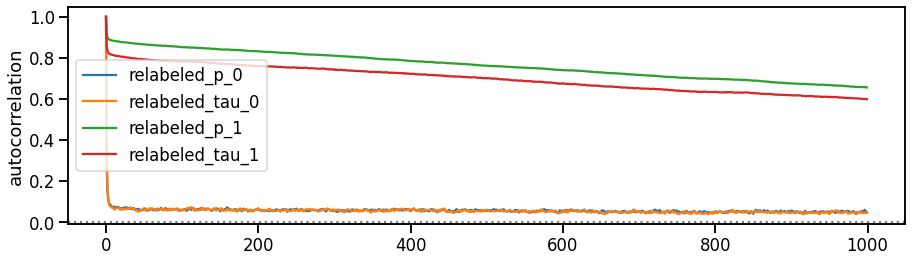

Writing results to BNP_trajectories/mAF-mAD_mixed_11_mcmc_noSB_1e-5.csv.gz


fitting dataset... mAF-mAD_mixed_21


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


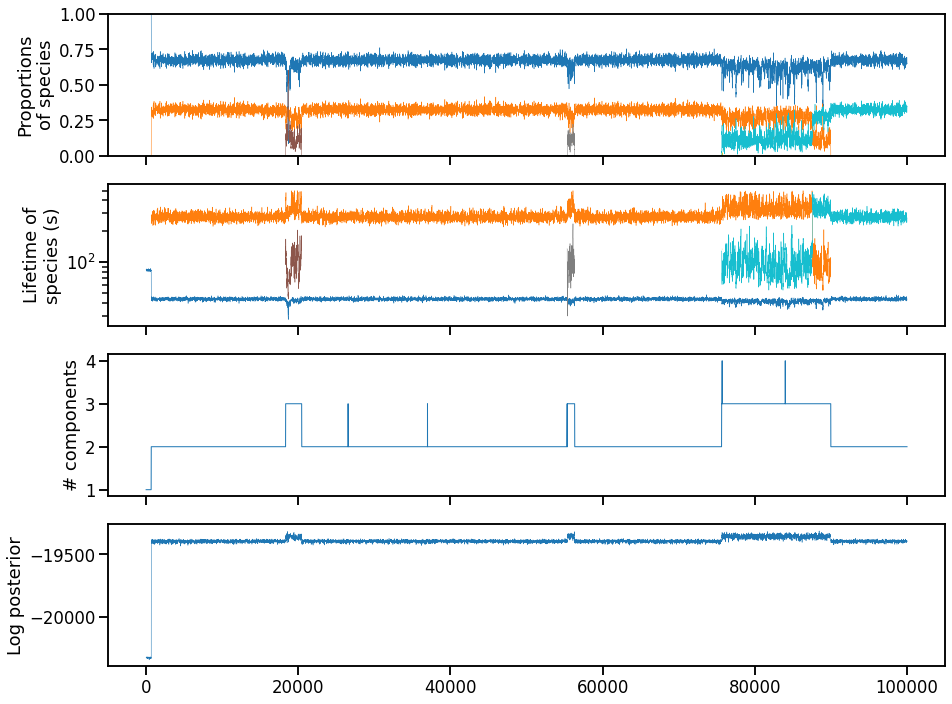

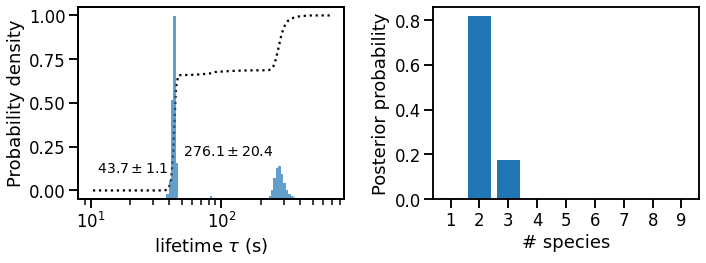

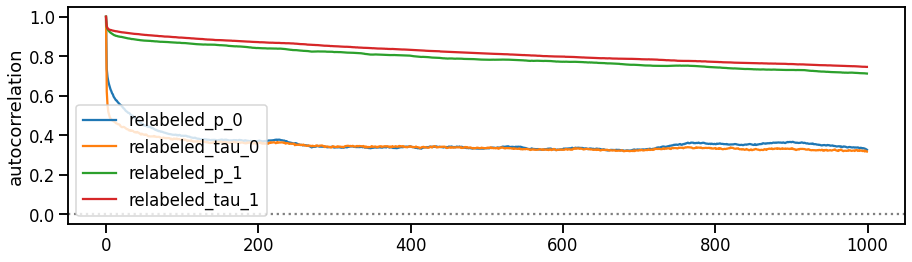

Writing results to BNP_trajectories/mAF-mAD_mixed_21_mcmc_noSB_1e-5.csv.gz


fitting dataset... mAF-mAD_mixed_12


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  # return np.log(np.random.dirichlet(alphas))


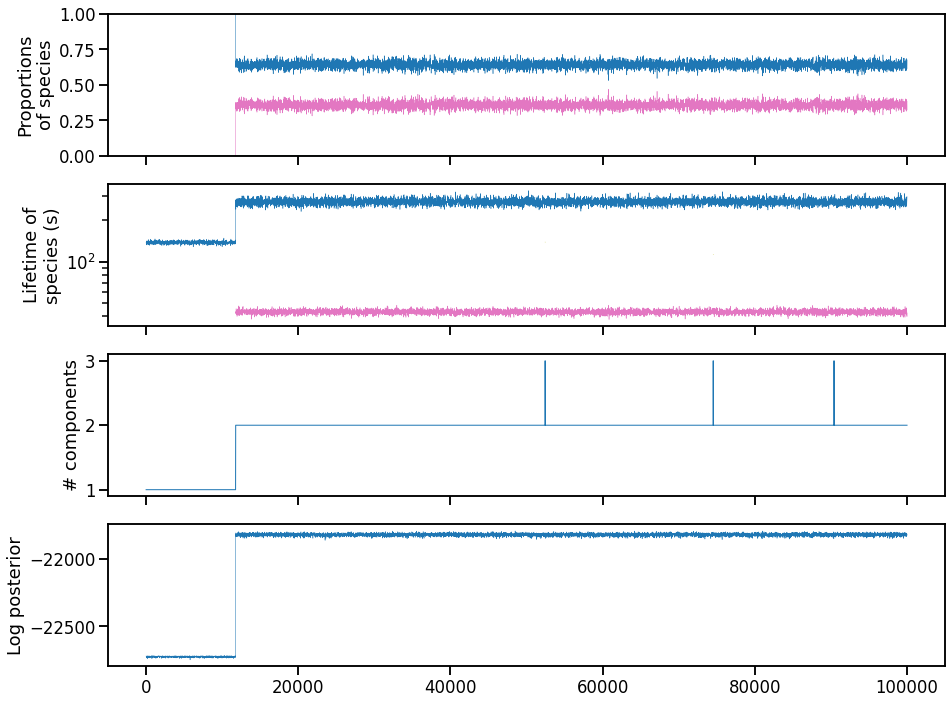

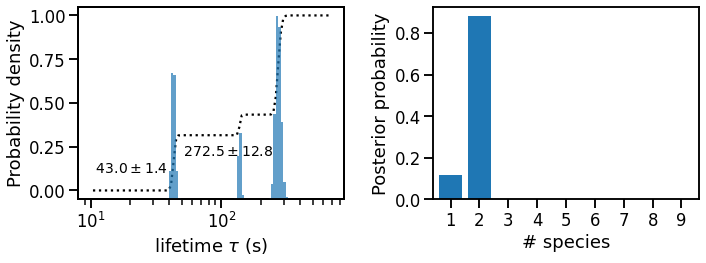

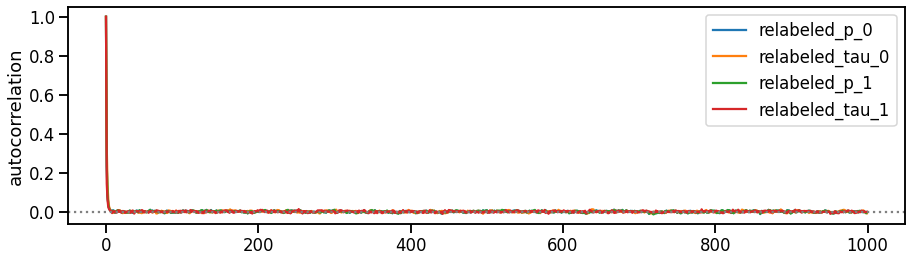

Writing results to BNP_trajectories/mAF-mAD_mixed_12_mcmc_noSB_1e-5.csv.gz




In [10]:
fit_datasets(do_truncation=True, gamma=1e-3, output_file_suffix='_noSB_1e-3', **kwargs)
print('NEXT SET')
fit_datasets(do_truncation=True, gamma=3e-4, output_file_suffix='_noSB_3e-4', **kwargs)
print('NEXT SET')
fit_datasets(do_truncation=True, gamma=1e-4, output_file_suffix='_noSB_1e-4', **kwargs)
print('NEXT SET')
fit_datasets(do_truncation=True, gamma=3e-5, output_file_suffix='_noSB_3e-5', **kwargs)
print('NEXT SET')
fit_datasets(do_truncation=True, gamma=1e-5, output_file_suffix='_noSB_1e-5', **kwargs)

fitting dataset... pAF_30pN


C:\Users\jeffj\Documents\lab\wong-rotation\data\yi-prelim\Antibody_CFM_analysis\model.py:213: RuntimeWarning: divide by zero encountered in log
  return np.log(np.random.dirichlet(alphas))


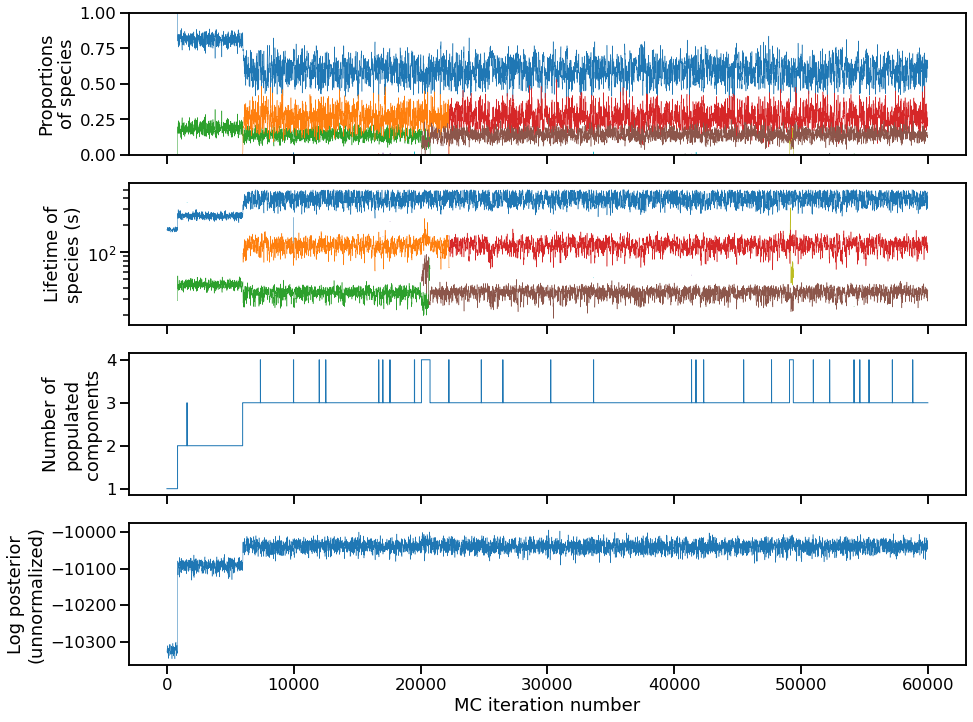

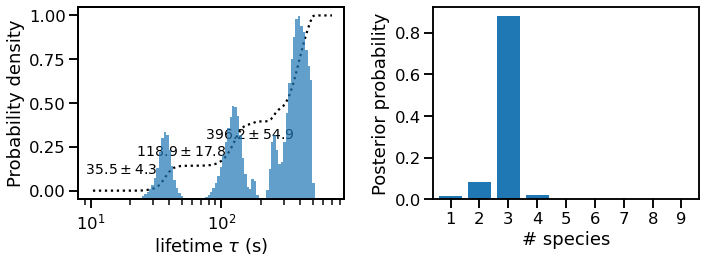

Writing results to BNP_trajectories/pAF_30pN_mcmc_noSB_1e-3_Kmax_50.csv.gz




In [19]:
kwargs['rng_seed'] = 55
kwargs['K_max'] = 50
kwargs['datasets'] = ['pAF_30pN']
kwargs['num_iterations'] = 60000
fit_datasets(do_truncation=True, gamma=1e-3, output_file_suffix='_noSB_1e-3_Kmax_50', **kwargs)

fitting dataset... pAF_30pN


  0%|          | 0/100000 [00:00<?, ?it/s]

/mnt/c/Users/jeffj/Documents/lab/wong-rotation/data/yi-prelim/Antibody_CFM_analysis/model.py:214: RuntimeWarning: divide by zero encountered in log
  return np.log(np.random.dirichlet(alphas))


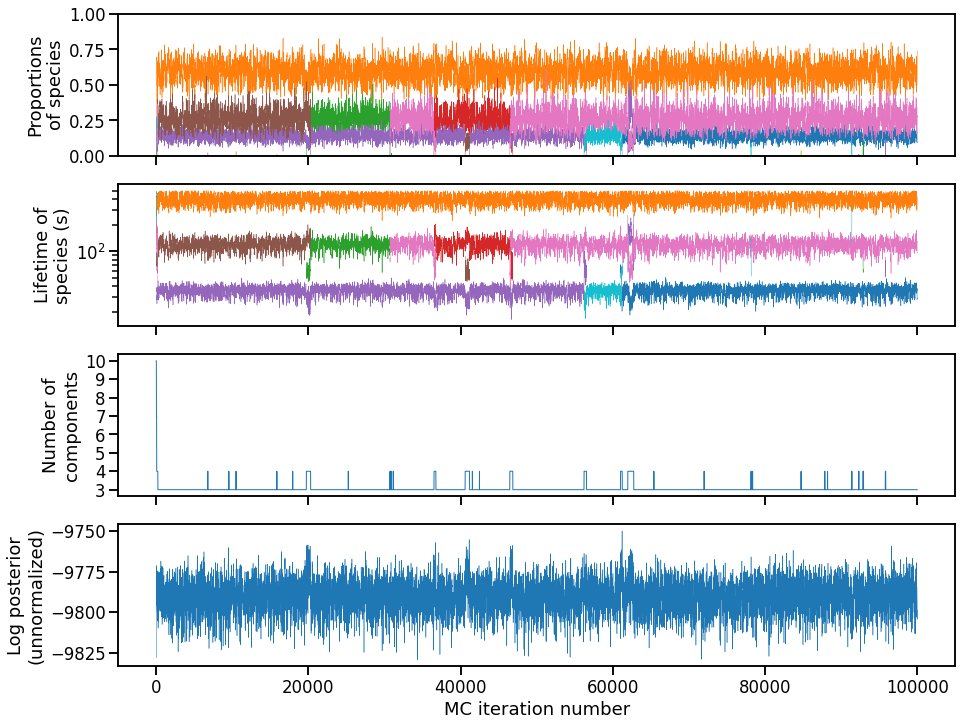

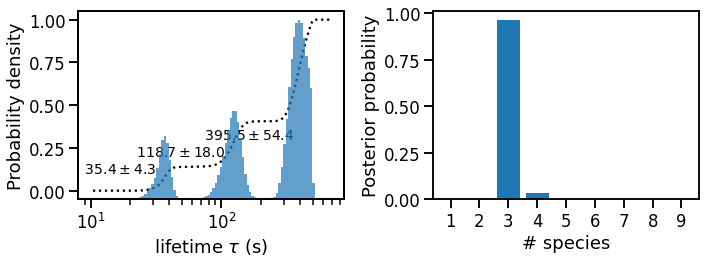

Writing results to BNP_trajectories/pAF_30pN_mcmc_noSB_1e-4_equal_init.csv.gz




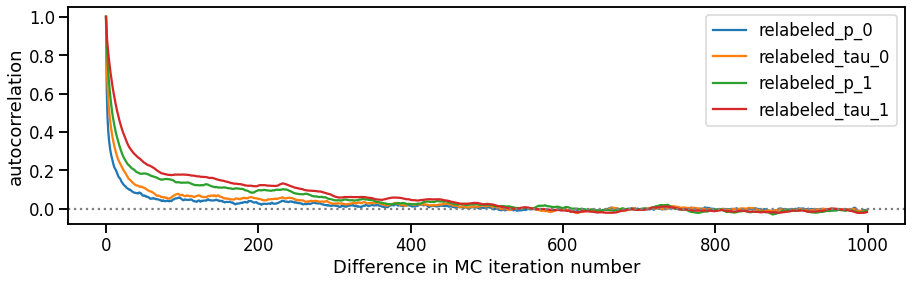

In [8]:
kwargs['datasets'] = ['pAF_30pN']
fit_datasets(do_truncation=True, gamma=1e-4, output_file_suffix='_noSB_1e-4_equal_init', 
             init_from_equal_classes=True, **kwargs)